# Exploring Leading Economic Indicators

#### Notebook Structure

1. [ISM Reports for the US Manufacturing and Services Sectors](#1.-ISM-PMI-Reports-for-the-US-Manufacturing-and-Services-Sectors)
2. [University of Michigan Consumer Sentiment](#2.-University-of-Michigan-Consumer-Sentiment)
3. [U.S. Census Bureau's Building Permits Survey](#3.-U.S.-Census-Bureau's-Building-Permits-Survey)
4. [European Economic Sentiment](#4.-European-Economic-Sentiment)
5. [Caixin Manufacturing and Services PMI](#5.-Caixin-Manufacturing-and-Services-PMI)
6. [Market Data Snapshot from Trading Economics](#6.-Market-Data-Snapshot-from-Trading-Economics)
7. [Industry and Stock-Level Data from FinViz](#7.-Industry-and-Stock-Level-Data-from-FinViz)

#### Import Modules

In [163]:
from scrapers import *
from IPython.display import display, Markdown
from matplotlib import colors, pyplot as plt
import seaborn as sns
import re

#### Markdown DIsplay Function

In [262]:
def displayMD(obj: str | pd.DataFrame, bold: bool=False, italic: bool=False, block: bool=False, align: str='left', index: bool=False):
    
    if type(obj) not in (str, pd.DataFrame): 
        raise TypeError('Fuction only prints strings and DataFrames.')
    
    if type(obj) == str:
        text = obj
        text = re.sub(r'(?<!\n)\n(?!\n)', '<br><br>', text)
        if italic: text = f'<i>{text}</i>'
        if bold: text = f'<b>{text}</b>'
        text = f'<p style="text-align: {align}";>{text}</p>'
        if block: text = f'>{text}'
        display(Markdown(text))
    
    elif type(obj) == pd.DataFrame:
        html = obj.to_html(index=index, na_rep='&nbsp;')
        if italic: html = re.sub(r'(<th>)(.*)(</th>)', '\\1<i>\\2</i>\\3', html)
        if bold: html = re.sub(r'(<th>)(.*)(</th>)', '\\1<b>\\2</b>\\3', html)
        html = f'<div align="{align}">{html}</div>'
        if block: html = f'>{html}'
        display(Markdown(html))

## 1. ISM PMI Reports for the US Manufacturing and Services Sectors

The [ISM PMI (Purchasing Managers' Index) reports](https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/) are economic indicators published monthly by the Institute for Supply Management (ISM). These reports provide insights into the health of the manufacturing and non-manufacturing (services) sectors of the U.S. economy. The reports are based on surveys of purchasing and supply executives, and a reading above 50 indicates expansion, while a reading below 50 indicates contraction.

The ISM PMI reports are closely watched by investors, economists, and policymakers as they can influence market sentiment and potentially impact investment decisions. 

#### Getting Data from the ISM Manufacturing Report

The following are sections of the ISM manufacturing report, accessible as attributes of the ism_man object:

In [260]:
ism_man = IsmReport.download_manufacturing()

fields = (', ').join(ism_man.__dict__.keys())
displayMD(fields)

<p style="text-align: left";>_headline, _highlights, _overview, _comments, _full_pmi_table, _comm_price_up, _comm_price_down, _comm_supply_short, _index_summary, _new_orders_text, _new_orders_table, _production_text, _production_table, _employment_text, _employment_table, _supplier_deliveries_text, _supplier_deliveries_table, _inventories_text, _inventories_table, _customer_inventories_text, _customer_inventories_table, _prices_text, _prices_table, _backlog_orders_text, _backlog_orders_table, _export_orders_text, _export_orders_table, _imports_text, _imports_table, _buying_policy_text, _buying_policy_table, _industry_rankings, _respondents</p>

<br>The "download_manufacturing()" method gets the latest report by default. For a specific report, a URL may be passed as an argument.<br>Below are some sections from the report.

In [266]:
displayMD(ism_man.headline, bold=True, align='center')

displayMD(ism_man.overview, block=True)

displayMD(ism_man.full_pmi_table, index=True, bold=True, align='center')

displayMD("Comments from Industry", bold=True, align='center')

comments_df = ism_man.respondents
comments = ('\n').join(
    [f'<i>{sector}</i>: {comment}' for sector, comment 
     in zip(comments_df.index, comments_df.iloc[:, 0]) 
     if len(comment) > 0]
    )
displayMD(comments, block=True)

<p style="text-align: center";><b>Manufacturing PMI® at 49%</b></p>

><p style="text-align: left";>(Tempe, Arizona) — Economic activity in the manufacturing sector contracted in June for the fourth consecutive month, following a two-month expansion preceded by 26 straight months of contraction, say the nation's supply executives in the latest Manufacturing ISM® Report On Business®.<br><br>The report was issued today by Susan Spence, MBA, Chair of the Institute for Supply Management® (ISM®) Manufacturing Business Survey Committee:<br><br>“The Manufacturing PMI® registered 49 percent in June, a 0.5-percentage point increase compared to the 48.5 percent recorded in May. The overall economy continued in expansion for the 62nd month after one month of contraction in April 2020. (A Manufacturing PMI® above 42.3 percent, over a period of time, generally indicates an expansion of the overall economy.) The New Orders Index contracted for the fifth month in a row following a three-month period of expansion; the figure of 46.4 percent is 1.2 percentage points lower than the 47.6 percent recorded in May. The June reading of the Production Index (50.3 percent) is 4.9 percentage points higher than May’s figure of 45.4, returning the index to expansion territory. The Prices Index remained in expansion (or ‘increasing’) territory, registering 69.7 percent, up 0.3 percentage point compared to the reading of 69.4 percent reported in May. The Backlog of Orders Index registered 44.3 percent, down 2.8 percentage points compared to the 47.1 percent recorded in May. The Employment Index registered 45 percent, down 1.8 percentage points from May’s figure of 46.8 percent.<br><br>“The Supplier Deliveries Index indicated slower delivery performance, though the pace picked up somewhat: The reading of 54.2 percent is down 1.9 percentage points from the 56.1 percent recorded in May. (Supplier Deliveries is the only ISM® Report On Business® index that is inversed; a reading of above 50 percent indicates slower deliveries, which is typical as the economy improves and customer demand increases.) The Inventories Index registered 49.2 percent, up 2.5 percentage points compared to May’s reading of 46.7 percent.<br><br>“The New Export Orders Index reading of 46.3 percent is 6.2 percentage points higher than the reading of 40.1 percent registered in May. The Imports Index gained back its loss from the previous month, registering 47.4 percent, 7.5 percentage points higher than May’s reading of 39.9 percent.”<br><br>Spence continues, “In June, U.S. manufacturing activity slowed its rate of contraction, with improvements in inventories and production the biggest factors in the 0.5 percentage point gain in the Manufacturing PMI®.<br><br>“The demand indicators remain mixed, with the New Orders and Backlog of Orders indexes contracting at faster rates, while the Customers’ Inventories and New Export Orders indexes contracted at slower rates. A ‘too low’ status for the Customers’ Inventories Index is usually considered positive for future production.<br><br>“Regarding output, the Production Index increased month over month and is now in expansion territory, however; the Employment Index dropped further into contraction as managing head count is still the norm, as opposed to hiring. The mixed indicators in output suggest companies still being cautious in their hiring even with an increase in production.<br><br>“Finally, inputs are defined as supplier deliveries, inventories, prices and imports. The Inventories Index remains in contraction territory (though at a slower rate compared to May) after expanding in April, as companies completed pull-forward activity ahead of tariffs. The Supplier Deliveries Index indicated slower deliveries but improved performance, indicating that the delays in clearing goods through ports of entry are largely complete. Tariffs-induced prices growth accelerated, while the Imports Index remained in contraction but regained the ground it lost the previous month.<br><br>“Looking at the manufacturing economy, 46 percent of the sector’s gross domestic product (GDP) contracted in June, down from 57 percent in May; however, 25 percent of GDP is strongly contracting (registering a composite PMI® of 45 percent or lower), up from 5 percent in May. The share of sector GDP with a PMI® at or below 45 percent is a good metric to gauge overall manufacturing weakness. Of the six largest manufacturing industries, four (Petroleum & Coal Products; Computer & Electronic Products; Machinery; and Food, Beverage & Tobacco Products) expanded in June, compared to two in May,” says Spence.<br><br>The nine manufacturing industries reporting growth in June — listed in order — are: Apparel, Leather & Allied Products; Petroleum & Coal Products; Nonmetallic Mineral Products; Miscellaneous Manufacturing; Furniture & Related Products; Computer & Electronic Products; Machinery; Food, Beverage & Tobacco Products; and Electrical Equipment, Appliances & Components. The six industries reporting contraction in June — in the following order — are: Textile Mills; Wood Products; Paper Products; Chemical Products; Transportation Equipment; and Fabricated Metal Products.</p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Jun</b></th>
      <th><b>Series Index May</b></th>
      <th><b>Percentage Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Manufacturing PMI®</b></th>
      <td>49.0</td>
      <td>48.5</td>
      <td>0.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>46.4</td>
      <td>47.6</td>
      <td>-1.2</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th><b>Production</b></th>
      <td>50.3</td>
      <td>45.4</td>
      <td>4.9</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>45.0</td>
      <td>46.8</td>
      <td>-1.8</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>54.2</td>
      <td>56.1</td>
      <td>-1.9</td>
      <td>Slowing</td>
      <td>Slower</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>49.2</td>
      <td>46.7</td>
      <td>2.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th><b>Customers’ Inventories</b></th>
      <td>46.7</td>
      <td>44.5</td>
      <td>2.2</td>
      <td>Too Low</td>
      <td>Slower</td>
      <td>9.0</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>69.7</td>
      <td>69.4</td>
      <td>0.3</td>
      <td>Increasing</td>
      <td>Faster</td>
      <td>9.0</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>44.3</td>
      <td>47.1</td>
      <td>-2.8</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>33.0</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>46.3</td>
      <td>40.1</td>
      <td>6.2</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>47.4</td>
      <td>39.9</td>
      <td>7.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th><b>OVERALL ECONOMY</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Faster</td>
      <td>62.0</td>
    </tr>
    <tr>
      <th><b>Manufacturing Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>4.0</td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Comments from Industry</b></p>

><p style="text-align: left";><i>Chemical Products</i>: The biopharmaceutical space is starting to see more pronounced headwinds: Stock prices have significantly eroded, companies are facing hiring freezes, and so on.<br><br><i>Computer & Electronic Products</i>: Tariffs continue to cause confusion and uncertainty for long-term procurement decisions. The situation remains too volatile to firmly put such plans into place.<br><br><i>Fabricated Metal Products</i>: Business has notably slowed in last four to six weeks. Customers do not want to make commitments in the wake of massive tariff uncertainty.<br><br><i>Food, Beverage & Tobacco Products</i>: Tariff volatility has impacted machinery, steel and specialized components. Also, potential shortages of skilled labor for construction, maintenance and installation.<br><br><i>Machinery</i>: The tariff mess has utterly stopped sales globally and domestically. Everyone is on pause. Orders have collapsed.<br><br><i>Miscellaneous Manufacturing</i>: The geopolitical environment remains volatile: (1) ongoing shifts in U.S. tariff policy make it difficult to plan, (2) emerging conflicts in the Middle East could pose long-term commodity risks and (3) China measures on rare earth materials are causing challenges. Overall outlook for our company is positive; it’s just extremely hard to make near-term supply plans/strategies or budgets.<br><br><i>Petroleum & Coal Products</i>: Tariffs continue to impact material pricing.<br><br><i>Primary Metals</i>: Tariffs, chaos, sluggish economy, rising prices, Ukraine, Iran, geopolitical unrest around the world — all make for a landscape that is hellacious, and fatigue is setting in due to dealing with these issues across the spectrum. Unfortunately, this is just the beginning unless something drastically changes, but the supply chain implications will grow — depots will not be stocked, less material will be available, and it will take years for domestic production to handle the needs (if companies even want to).<br><br><i>Transportation Equipment</i>: The word that best describes the current market outlook is ‘uncertainty.’ The erratic trade policy with on-again/off-again tariffs has led to price uncertainty for customers, who appear to be prepared to hold off large capital purchases until stability returns. This has resulted in further reductions in customer demand and softening sales for the balance of 2025. Operations has planned additional weeks of downtime at multiple plants to accommodate reduced orders. Next year’s forecast is not any better at this point. Additionally, most electric vehicle (EV) projects have been delayed or canceled, resulting in a significant amount of unutilized capital investment. EV technology launches for 2026-28 have been delayed past 2030.<br><br><i>Wood Products</i>: Middle East unrest as well as unstable long-term tariff positions continue to impact second- and third-tier sources, which is applying pressure to material costs. Costs are up 6 percent to 10 percent over budgeted inflation — and the forecast accounted for the volatility expected with the current administration.</p>

<br>The process for obtaining the ISM services report is identical. Only the sectors and a few attributes differ between _ManufactingPmi_ and _ServicesPmi_ objects

In [267]:
ism_serv = IsmReport.download_services()

displayMD(ism_serv.headline, bold=True, align='center')

displayMD(ism_serv.full_pmi_table, index=True, bold=True, align='center')

displayMD("Comments from Industry", bold=True, align='center')

comments_df = ism_serv.respondents
comments = ('\n').join(
    [f'<i>{sector}</i>: {comment}' for sector, comment 
     in zip(comments_df.index, comments_df.iloc[:, 0]) 
     if len(comment) > 0]
    )
displayMD(comments, block=True)

<p style="text-align: center";><b>Services PMI® at 50.8%</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th colspan="6" halign="left">Services PMI®</th>
      <th colspan="3" halign="left">Manufacturing PMI®</th>
    </tr>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Jun</b></th>
      <th><b>Series Index May</b></th>
      <th><b>Percent Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
      <th><b>Series Index Jun</b></th>
      <th><b>Series Index May</b></th>
      <th><b>Percent Point Change</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Services PMI®</b></th>
      <td>50.8</td>
      <td>49.9</td>
      <td>0.9</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td>49.0</td>
      <td>48.5</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th><b>Business Activity/ Production</b></th>
      <td>54.2</td>
      <td>50.0</td>
      <td>4.2</td>
      <td>Growing</td>
      <td>From Unchanged</td>
      <td>1.0</td>
      <td>50.3</td>
      <td>45.4</td>
      <td>4.9</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>51.3</td>
      <td>46.4</td>
      <td>4.9</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td>46.4</td>
      <td>47.6</td>
      <td>-1.2</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>47.2</td>
      <td>50.7</td>
      <td>-3.5</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>45.0</td>
      <td>46.8</td>
      <td>-1.8</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>50.3</td>
      <td>52.5</td>
      <td>-2.2</td>
      <td>Slowing</td>
      <td>Slower</td>
      <td>7.0</td>
      <td>54.2</td>
      <td>56.1</td>
      <td>-1.9</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>52.7</td>
      <td>49.7</td>
      <td>3.0</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td>49.2</td>
      <td>46.7</td>
      <td>2.5</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>67.5</td>
      <td>68.7</td>
      <td>-1.2</td>
      <td>Increasing</td>
      <td>Slower</td>
      <td>97.0</td>
      <td>69.7</td>
      <td>69.4</td>
      <td>0.3</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>42.4</td>
      <td>43.4</td>
      <td>-1.0</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>4.0</td>
      <td>44.3</td>
      <td>47.1</td>
      <td>-2.8</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>51.1</td>
      <td>48.5</td>
      <td>2.6</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td>46.3</td>
      <td>40.1</td>
      <td>6.2</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>51.7</td>
      <td>48.2</td>
      <td>3.5</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td>47.4</td>
      <td>39.9</td>
      <td>7.5</td>
    </tr>
    <tr>
      <th><b>Inventory Sentiment</b></th>
      <td>57.1</td>
      <td>62.9</td>
      <td>-5.8</td>
      <td>Too High</td>
      <td>Slower</td>
      <td>26.0</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th><b>Customers' Inventories</b></th>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>46.7</td>
      <td>44.5</td>
      <td>2.2</td>
    </tr>
    <tr>
      <th><b>Overall Economy</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Faster</td>
      <td>61.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th><b>Services Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Comments from Industry</b></p>

><p style="text-align: left";><i>Accommodation & Food Services</i>: Restaurant sales and traffic remain flat to prior year. Staffing is adequate for our current needs, and no supply chain concerns this month.<br><br><i>Agriculture, Forestry, Fishing & Hunting</i>: Increased cost from tariffs and the potential for tariffs is impacting cost increases. Higher cost of high-dollar items like 150-horsepower farm tractors are forcing farmers to delay purchasing or purchase used equipment. Tension in the Middle East is creating great concern and uncertainty.<br><br><i>Construction</i>: Sales remain stubbornly slow due to affordability issues with higher mortgage rates and high property values. Residential construction has embarked on cost-cutting measures through value engineering, supplier margin reductions and layoffs.<br><br><i>Health Care & Social Assistance</i>: Prices have gone up from tariff recovery fees — separate line items — but the supply chain, deliveries and inventories have remained mostly stable after the initial disruption. Costs continue to increase across the board, so our goal is to mitigate that.<br><br><i>Information</i>: General uncertainty around the economy continues to drive increases in prices. Also, lots of SaaS (software-as-a-service) vendors are using the AI (artificial intelligence) boom to restructure pricing and products, resulting in massive increases.<br><br><i>Other Services</i>: After several slow months, business is starting to increase. New requests are going out to suppliers.<br><br><i>Professional, Scientific & Technical Services</i>: Confidence in a predictable economic environment has eroded to a point where capital investments are being severely curtailed.<br><br><i>Real Estate, Rental & Leasing</i>: Business growth is slow. Global economic conditions impacted by U.S. tariffs are creating significant uncertainty, which is holding businesses back from making short- to medium-term business decisions.<br><br><i>Utilities</i>: Lead times are extending in the past month or two. Seeing high-single- or low-double-digit percent increases in pricing on metals related to commodity hardware and products.<br><br><i>Wholesale Trade</i>: Business seems to be picking up. Many of the macroeconomic factors that were concerning look to be playing out in our favor. High interest rates are still a problem. Supplies are ample for current business levels.</p>

## 2. University of Michigan Consumer Sentiment[](#2-university-of-michigan-consumer-sentiment)

The [University of Michigan Consumer Sentiment Index (MCSI)](https://www.sca.isr.umich.edu/) is a monthly survey that measures how optimistic or pessimistic US consumers are about the economy. It gauges their attitudes towards personal finances, business conditions, and overall economic activity. The index is based on interviews conducted by the University of Michigan's Institute for Social Research.

Consumer spending is a major driver of the US economy, and the MCSI is considered a leading indicator of future economic activity. 

The MCSI is composed of the Index of Current Economic Conditions (which reflects current financial situations) and the Index of Consumer Expectations (which reflects future outlook). A value of greater than 80 indicates bullish sentiment, whereas below 70 indicates bearish sentiment. 

#### Getting Data from the Consumer Survey

In [268]:
consumer = ConsumerSurvey.download()

displayMD("MCSI Current and Future Expectations", bold=True, align='center')
displayMD(consumer.table, bold=True, align='center')

<p style="text-align: center";><b>MCSI Current and Future Expectations</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Index</b></th>
      <th><b>Current Index</b></th>
      <th><b>Expected Index</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2024</td>
      <td>6</td>
      <td>68.2</td>
      <td>65.9</td>
      <td>69.6</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>7</td>
      <td>66.4</td>
      <td>62.7</td>
      <td>68.8</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>8</td>
      <td>67.9</td>
      <td>61.3</td>
      <td>72.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>9</td>
      <td>70.1</td>
      <td>63.3</td>
      <td>74.4</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>10</td>
      <td>70.5</td>
      <td>64.9</td>
      <td>74.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>11</td>
      <td>71.8</td>
      <td>63.9</td>
      <td>76.9</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>12</td>
      <td>74.0</td>
      <td>75.1</td>
      <td>73.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>1</td>
      <td>71.7</td>
      <td>75.1</td>
      <td>69.5</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>2</td>
      <td>64.7</td>
      <td>65.7</td>
      <td>64.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>57.0</td>
      <td>63.8</td>
      <td>52.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>52.2</td>
      <td>59.8</td>
      <td>47.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>52.2</td>
      <td>58.9</td>
      <td>47.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>60.7</td>
      <td>64.8</td>
      <td>58.1</td>
    </tr>
  </tbody>
</table></div>

## 3. U.S. Census Bureau's Building Permits Survey

The [U.S. Census Bureau's Building Permits Survey (BPS)](https://www.census.gov/construction/nrc/current/index.html) is a monthly survey that collects data on new privately-owned residential construction. It's a key economic indicator, providing statistics on the number of housing units authorized by building permits, and the valuation of those permits, at national, state, and local levels. This data is vital for understanding the health and direction of the housing market and the broader economy. 

#### Getting Data from the Building Permits Survey

In [269]:
build = ConstructionSurvey.download()

displayMD("US Census Bureau Construction Survey Data", bold=True, align='center')
displayMD(build.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>US Census Bureau Construction Survey Data</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Permits</b></th>
      <th><b>Authorized</b></th>
      <th><b>Starts</b></th>
      <th><b>Under Construction</b></th>
      <th><b>Completions</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>1</td>
      <td>1460.0</td>
      <td>283.0</td>
      <td>1358.0</td>
      <td>1402.0</td>
      <td>1651.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>2</td>
      <td>1454.0</td>
      <td>277.0</td>
      <td>1490.0</td>
      <td>1408.0</td>
      <td>1565.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>1481.0</td>
      <td>268.0</td>
      <td>1355.0</td>
      <td>1401.0</td>
      <td>1566.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>1422.0</td>
      <td>276.0</td>
      <td>1392.0</td>
      <td>1394.0</td>
      <td>1448.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>1394.0</td>
      <td>282.0</td>
      <td>1256.0</td>
      <td>1375.0</td>
      <td>1526.0</td>
    </tr>
  </tbody>
</table></div>

<br>In future, plotting methods may be built-into to the ConstructionSurvey class to allow easy visualisation of trends:

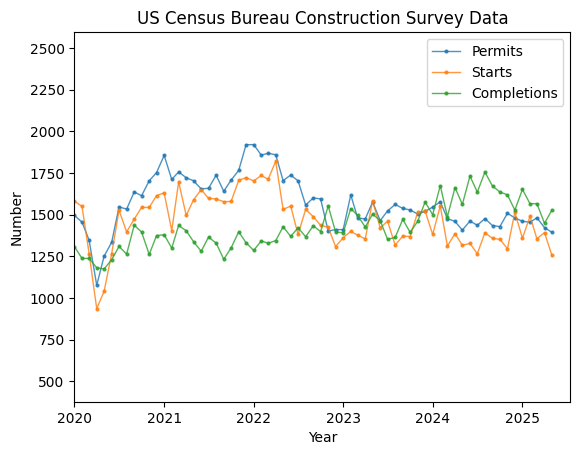

In [171]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = build.table
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

fig, ax = plt.subplots()
ax.plot(dates, df['Permits'], label='Permits', **line_settings)
ax.plot(dates, df['Starts'], label='Starts', **line_settings)
ax.plot(dates, df['Completions'], label='Completions', **line_settings)

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('US Census Bureau Construction Survey Data')
ax.legend()

plt.show()

## 4. European Economic Sentiment

The [European Economic Sentiment Indicator (ESI)](https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/business-and-consumer-surveys_en) is a composite measure that tracks economic confidence in the EU and euro area. It's a weighted average of confidence indicators from five key sectors: industry, services, consumers, retail trade, and construction. The ESI is used to gauge overall economic sentiment and its fluctuations, with values above 100 indicating above-average sentiment and values below 100 indicating below-average sentiment. 

#### Getting Data from the European Economic Sentiment Surveys

In [270]:
euro = EuroSurvey.download()

displayMD("EU Economic Sentiment Indicator and Components", bold=True, align='center')
displayMD(euro.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>EU Economic Sentiment Indicator and Components</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>EU.INDU</b></th>
      <th><b>EU.SERV</b></th>
      <th><b>EU.CONS</b></th>
      <th><b>EU.RETA</b></th>
      <th><b>EU.BUIL</b></th>
      <th><b>EU.ESI</b></th>
      <th><b>EU.EEI</b></th>
      <th><b>EA.INDU</b></th>
      <th><b>EA.SERV</b></th>
      <th><b>EA.CONS</b></th>
      <th><b>EA.RETA</b></th>
      <th><b>EA.BUIL</b></th>
      <th><b>EA.ESI</b></th>
      <th><b>EA.EEI</b></th>
      <th><b>BE.INDU</b></th>
      <th><b>BE.SERV</b></th>
      <th><b>BE.CONS</b></th>
      <th><b>BE.RETA</b></th>
      <th><b>BE.BUIL</b></th>
      <th><b>BE.ESI</b></th>
      <th><b>BE.EEI</b></th>
      <th><b>BG.INDU</b></th>
      <th><b>BG.SERV</b></th>
      <th><b>BG.CONS</b></th>
      <th><b>BG.RETA</b></th>
      <th><b>BG.BUIL</b></th>
      <th><b>BG.ESI</b></th>
      <th><b>BG.EEI</b></th>
      <th><b>CZ.INDU</b></th>
      <th><b>CZ.SERV</b></th>
      <th><b>CZ.CONS</b></th>
      <th><b>CZ.RETA</b></th>
      <th><b>CZ.BUIL</b></th>
      <th><b>CZ.ESI</b></th>
      <th><b>CZ.EEI</b></th>
      <th><b>DK.INDU</b></th>
      <th><b>DK.SERV</b></th>
      <th><b>DK.CONS</b></th>
      <th><b>DK.RETA</b></th>
      <th><b>DK.BUIL</b></th>
      <th><b>DK.ESI</b></th>
      <th><b>DK.EEI</b></th>
      <th><b>DE.INDU</b></th>
      <th><b>DE.SERV</b></th>
      <th><b>DE.CONS</b></th>
      <th><b>DE.RETA</b></th>
      <th><b>DE.BUIL</b></th>
      <th><b>DE.ESI</b></th>
      <th><b>DE.EEI</b></th>
      <th><b>EE.INDU</b></th>
      <th><b>EE.SERV</b></th>
      <th><b>EE.CONS</b></th>
      <th><b>EE.RETA</b></th>
      <th><b>EE.BUIL</b></th>
      <th><b>EE.ESI</b></th>
      <th><b>EE.EEI</b></th>
      <th><b>IE.INDU</b></th>
      <th><b>IE.SERV</b></th>
      <th><b>IE.CONS</b></th>
      <th><b>IE.RETA</b></th>
      <th><b>IE.BUIL</b></th>
      <th><b>IE.ESI</b></th>
      <th><b>IE.EEI</b></th>
      <th><b>EL.INDU</b></th>
      <th><b>EL.SERV</b></th>
      <th><b>EL.CONS</b></th>
      <th><b>EL.RETA</b></th>
      <th><b>EL.BUIL</b></th>
      <th><b>EL.ESI</b></th>
      <th><b>EL.EEI</b></th>
      <th><b>ES.INDU</b></th>
      <th><b>ES.SERV</b></th>
      <th><b>ES.CONS</b></th>
      <th><b>ES.RETA</b></th>
      <th><b>ES.BUIL</b></th>
      <th><b>ES.ESI</b></th>
      <th><b>ES.EEI</b></th>
      <th><b>FR.INDU</b></th>
      <th><b>FR.SERV</b></th>
      <th><b>FR.CONS</b></th>
      <th><b>FR.RETA</b></th>
      <th><b>FR.BUIL</b></th>
      <th><b>FR.ESI</b></th>
      <th><b>FR.EEI</b></th>
      <th><b>HR.INDU</b></th>
      <th><b>HR.SERV</b></th>
      <th><b>HR.CONS</b></th>
      <th><b>HR.RETA</b></th>
      <th><b>HR.BUIL</b></th>
      <th><b>HR.ESI</b></th>
      <th><b>HR.EEI</b></th>
      <th><b>IT.INDU</b></th>
      <th><b>IT.SERV</b></th>
      <th><b>IT.CONS</b></th>
      <th><b>IT.RETA</b></th>
      <th><b>IT.BUIL</b></th>
      <th><b>IT.ESI</b></th>
      <th><b>IT.EEI</b></th>
      <th><b>CY.INDU</b></th>
      <th><b>CY.SERV</b></th>
      <th><b>CY.CONS</b></th>
      <th><b>CY.RETA</b></th>
      <th><b>CY.BUIL</b></th>
      <th><b>CY.ESI</b></th>
      <th><b>CY.EEI</b></th>
      <th><b>LV.INDU</b></th>
      <th><b>LV.SERV</b></th>
      <th><b>LV.CONS</b></th>
      <th><b>LV.RETA</b></th>
      <th><b>LV.BUIL</b></th>
      <th><b>LV.ESI</b></th>
      <th><b>LV.EEI</b></th>
      <th><b>LT.INDU</b></th>
      <th><b>LT.SERV</b></th>
      <th><b>LT.CONS</b></th>
      <th><b>LT.RETA</b></th>
      <th><b>LT.BUIL</b></th>
      <th><b>LT.ESI</b></th>
      <th><b>LT.EEI</b></th>
      <th><b>LU.INDU</b></th>
      <th><b>LU.SERV</b></th>
      <th><b>LU.CONS</b></th>
      <th><b>LU.RETA</b></th>
      <th><b>LU.BUIL</b></th>
      <th><b>LU.ESI</b></th>
      <th><b>LU.EEI</b></th>
      <th><b>HU.INDU</b></th>
      <th><b>HU.SERV</b></th>
      <th><b>HU.CONS</b></th>
      <th><b>HU.RETA</b></th>
      <th><b>HU.BUIL</b></th>
      <th><b>HU.ESI</b></th>
      <th><b>HU.EEI</b></th>
      <th><b>MT.INDU</b></th>
      <th><b>MT.SERV</b></th>
      <th><b>MT.CONS</b></th>
      <th><b>MT.RETA</b></th>
      <th><b>MT.BUIL</b></th>
      <th><b>MT.ESI</b></th>
      <th><b>MT.EEI</b></th>
      <th><b>NL.INDU</b></th>
      <th><b>NL.SERV</b></th>
      <th><b>NL.CONS</b></th>
      <th><b>NL.RETA</b></th>
      <th><b>NL.BUIL</b></th>
      <th><b>NL.ESI</b></th>
      <th><b>NL.EEI</b></th>
      <th><b>AT.INDU</b></th>
      <th><b>AT.SERV</b></th>
      <th><b>AT.CONS</b></th>
      <th><b>AT.RETA</b></th>
      <th><b>AT.BUIL</b></th>
      <th><b>AT.ESI</b></th>
      <th><b>AT.EEI</b></th>
      <th><b>PL.INDU</b></th>
      <th><b>PL.SERV</b></th>
      <th><b>PL.CONS</b></th>
      <th><b>PL.RETA</b></th>
      <th><b>PL.BUIL</b></th>
      <th><b>PL.ESI</b></th>
      <th><b>PL.EEI</b></th>
      <th><b>PT.INDU</b></th>
      <th><b>PT.SERV</b></th>
      <th><b>PT.CONS</b></th>
      <th><b>PT.RETA</b></th>
      <th><b>PT.BUIL</b></th>
      <th><b>PT.ESI</b></th>
      <th><b>PT.EEI</b></th>
      <th><b>RO.INDU</b></th>
      <th><b>RO.SERV</b></th>
      <th><b>RO.CONS</b></th>
      <th><b>RO.RETA</b></th>
      <th><b>RO.BUIL</b></th>
      <th><b>RO.ESI</b></th>
      <th><b>RO.EEI</b></th>
      <th><b>SI.INDU</b></th>
      <th><b>SI.SERV</b></th>
      <th><b>SI.CONS</b></th>
      <th><b>SI.RETA</b></th>
      <th><b>SI.BUIL</b></th>
      <th><b>SI.ESI</b></th>
      <th><b>SI.EEI</b></th>
      <th><b>SK.INDU</b></th>
      <th><b>SK.SERV</b></th>
      <th><b>SK.CONS</b></th>
      <th><b>SK.RETA</b></th>
      <th><b>SK.BUIL</b></th>
      <th><b>SK.ESI</b></th>
      <th><b>SK.EEI</b></th>
      <th><b>FI.INDU</b></th>
      <th><b>FI.SERV</b></th>
      <th><b>FI.CONS</b></th>
      <th><b>FI.RETA</b></th>
      <th><b>FI.BUIL</b></th>
      <th><b>FI.ESI</b></th>
      <th><b>FI.EEI</b></th>
      <th><b>SE.INDU</b></th>
      <th><b>SE.SERV</b></th>
      <th><b>SE.CONS</b></th>
      <th><b>SE.RETA</b></th>
      <th><b>SE.BUIL</b></th>
      <th><b>SE.ESI</b></th>
      <th><b>SE.EEI</b></th>
      <th><b>UK.INDU</b></th>
      <th><b>UK.SERV</b></th>
      <th><b>UK.CONS</b></th>
      <th><b>UK.RETA</b></th>
      <th><b>UK.BUIL</b></th>
      <th><b>UK.ESI</b></th>
      <th><b>UK.EEI</b></th>
      <th><b>ME.INDU</b></th>
      <th><b>ME.SERV</b></th>
      <th><b>ME.CONS</b></th>
      <th><b>ME.RETA</b></th>
      <th><b>ME.BUIL</b></th>
      <th><b>ME.ESI</b></th>
      <th><b>ME.EEI</b></th>
      <th><b>MK.INDU</b></th>
      <th><b>MK.SERV</b></th>
      <th><b>MK.CONS</b></th>
      <th><b>MK.RETA</b></th>
      <th><b>MK.BUIL</b></th>
      <th><b>MK.ESI</b></th>
      <th><b>MK.EEI</b></th>
      <th><b>AL.INDU</b></th>
      <th><b>AL.SERV</b></th>
      <th><b>AL.CONS</b></th>
      <th><b>AL.RETA</b></th>
      <th><b>AL.BUIL</b></th>
      <th><b>AL.ESI</b></th>
      <th><b>AL.EEI</b></th>
      <th><b>RS.INDU</b></th>
      <th><b>RS.SERV</b></th>
      <th><b>RS.CONS</b></th>
      <th><b>RS.RETA</b></th>
      <th><b>RS.BUIL</b></th>
      <th><b>RS.ESI</b></th>
      <th><b>RS.EEI</b></th>
      <th><b>TR.INDU</b></th>
      <th><b>TR.SERV</b></th>
      <th><b>TR.CONS</b></th>
      <th><b>TR.RETA</b></th>
      <th><b>TR.BUIL</b></th>
      <th><b>TR.ESI</b></th>
      <th><b>TR.EEI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>2</td>
      <td>-10.2</td>
      <td>5.9</td>
      <td>-12.9</td>
      <td>-3.5</td>
      <td>-5.9</td>
      <td>96.9</td>
      <td>98.4</td>
      <td>-11.1</td>
      <td>5.2</td>
      <td>-13.6</td>
      <td>-5.2</td>
      <td>-3.4</td>
      <td>96.2</td>
      <td>97.4</td>
      <td>-13.5</td>
      <td>-1.4</td>
      <td>-12.4</td>
      <td>-5.0</td>
      <td>-3.6</td>
      <td>94.0</td>
      <td>95.9</td>
      <td>1.2</td>
      <td>9.0</td>
      <td>-18.6</td>
      <td>16.2</td>
      <td>-2.5</td>
      <td>104.9</td>
      <td>114.1</td>
      <td>-5.1</td>
      <td>33.5</td>
      <td>-10.9</td>
      <td>18.9</td>
      <td>-5.1</td>
      <td>98.7</td>
      <td>94.3</td>
      <td>2.0</td>
      <td>7.7</td>
      <td>-11.0</td>
      <td>0.2</td>
      <td>-9.8</td>
      <td>102.1</td>
      <td>110.7</td>
      <td>-22.7</td>
      <td>4.9</td>
      <td>-11.4</td>
      <td>-21.6</td>
      <td>-15.2</td>
      <td>89.3</td>
      <td>91.0</td>
      <td>-9.9</td>
      <td>-0.9</td>
      <td>-37.6</td>
      <td>-11.3</td>
      <td>-20.9</td>
      <td>89.3</td>
      <td>91.7</td>
      <td>13.9</td>
      <td>27.1</td>
      <td>-11.7</td>
      <td>2.1</td>
      <td>27.3</td>
      <td>103.3</td>
      <td>101.1</td>
      <td>4.0</td>
      <td>28.5</td>
      <td>-42.0</td>
      <td>-0.3</td>
      <td>7.6</td>
      <td>106.7</td>
      <td>112.3</td>
      <td>-6.2</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>16.2</td>
      <td>102.3</td>
      <td>112.2</td>
      <td>-8.0</td>
      <td>-1.4</td>
      <td>-13.0</td>
      <td>-13.4</td>
      <td>-13.9</td>
      <td>98.4</td>
      <td>93.3</td>
      <td>-0.2</td>
      <td>26.0</td>
      <td>-16.1</td>
      <td>10.5</td>
      <td>16.2</td>
      <td>105.0</td>
      <td>108.2</td>
      <td>-8.2</td>
      <td>2.7</td>
      <td>-13.7</td>
      <td>10.2</td>
      <td>1.2</td>
      <td>99.7</td>
      <td>101.9</td>
      <td>1.6</td>
      <td>30.5</td>
      <td>-18.9</td>
      <td>1.4</td>
      <td>2.0</td>
      <td>108.3</td>
      <td>99.4</td>
      <td>-6.2</td>
      <td>3.7</td>
      <td>-13.1</td>
      <td>2.7</td>
      <td>-10.6</td>
      <td>98.3</td>
      <td>98.9</td>
      <td>-7.1</td>
      <td>0.4</td>
      <td>3.8</td>
      <td>0.2</td>
      <td>-13.8</td>
      <td>101.5</td>
      <td>102.4</td>
      <td>-16.7</td>
      <td>&lt;NA&gt;</td>
      <td>-11.4</td>
      <td>&lt;NA&gt;</td>
      <td>-26.0</td>
      <td>97.6</td>
      <td>&lt;NA&gt;</td>
      <td>-10.9</td>
      <td>-14.8</td>
      <td>-27.6</td>
      <td>-22.4</td>
      <td>-21.3</td>
      <td>93.5</td>
      <td>100.8</td>
      <td>-16.3</td>
      <td>8.0</td>
      <td>1.3</td>
      <td>9.0</td>
      <td>2.6</td>
      <td>94.9</td>
      <td>101.2</td>
      <td>-1.2</td>
      <td>4.9</td>
      <td>-16.9</td>
      <td>3.0</td>
      <td>15.3</td>
      <td>100.1</td>
      <td>103.4</td>
      <td>-15.8</td>
      <td>5.6</td>
      <td>-19.0</td>
      <td>-8.9</td>
      <td>-16.9</td>
      <td>91.0</td>
      <td>92.0</td>
      <td>-15.8</td>
      <td>-3.0</td>
      <td>-0.8</td>
      <td>-1.9</td>
      <td>-16.6</td>
      <td>100.8</td>
      <td>102.6</td>
      <td>-5.3</td>
      <td>7.5</td>
      <td>-15.1</td>
      <td>4.0</td>
      <td>4.5</td>
      <td>103.9</td>
      <td>108.5</td>
      <td>-1.4</td>
      <td>4.6</td>
      <td>-17.2</td>
      <td>7.8</td>
      <td>-8.1</td>
      <td>101.2</td>
      <td>102.6</td>
      <td>-6.8</td>
      <td>17.4</td>
      <td>-30.4</td>
      <td>20.9</td>
      <td>7.9</td>
      <td>97.5</td>
      <td>104.9</td>
      <td>-4.9</td>
      <td>13.8</td>
      <td>-23.1</td>
      <td>9.1</td>
      <td>-7.4</td>
      <td>95.7</td>
      <td>108.2</td>
      <td>-6.6</td>
      <td>2.7</td>
      <td>-9.1</td>
      <td>-5.2</td>
      <td>-29.8</td>
      <td>93.2</td>
      <td>95.5</td>
      <td>-3.7</td>
      <td>16.4</td>
      <td>-2.6</td>
      <td>22.1</td>
      <td>-28.4</td>
      <td>97.3</td>
      <td>102.6</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.1</td>
      <td>18.4</td>
      <td>-2.4</td>
      <td>8.4</td>
      <td>8.6</td>
      <td>107.6</td>
      <td>117.9</td>
      <td>-9.9</td>
      <td>12.9</td>
      <td>-3.9</td>
      <td>12.9</td>
      <td>-6.1</td>
      <td>98.0</td>
      <td>108.1</td>
      <td>3.9</td>
      <td>22.2</td>
      <td>-12.6</td>
      <td>16.2</td>
      <td>-6.9</td>
      <td>103.0</td>
      <td>104.5</td>
      <td>-0.9</td>
      <td>0.6</td>
      <td>-4.0</td>
      <td>12.0</td>
      <td>-4.9</td>
      <td>95.9</td>
      <td>101.3</td>
      <td>-1.8</td>
      <td>21.1</td>
      <td>-18.4</td>
      <td>13.5</td>
      <td>-10.6</td>
      <td>97.1</td>
      <td>99.8</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>-10.0</td>
      <td>3.9</td>
      <td>-13.9</td>
      <td>-5.4</td>
      <td>-5.8</td>
      <td>95.9</td>
      <td>97.7</td>
      <td>-10.7</td>
      <td>2.4</td>
      <td>-14.5</td>
      <td>-7.0</td>
      <td>-3.6</td>
      <td>95.1</td>
      <td>96.5</td>
      <td>-13.2</td>
      <td>-2.5</td>
      <td>-15.9</td>
      <td>-11.3</td>
      <td>-5.7</td>
      <td>91.6</td>
      <td>92.6</td>
      <td>1.6</td>
      <td>11.6</td>
      <td>-20.1</td>
      <td>15.9</td>
      <td>-4.4</td>
      <td>105.5</td>
      <td>113.0</td>
      <td>-2.9</td>
      <td>34.4</td>
      <td>-12.1</td>
      <td>22.9</td>
      <td>-4.6</td>
      <td>101.2</td>
      <td>98.3</td>
      <td>1.8</td>
      <td>5.3</td>
      <td>-11.7</td>
      <td>-4.4</td>
      <td>-8.4</td>
      <td>100.6</td>
      <td>108.6</td>
      <td>-21.0</td>
      <td>1.8</td>
      <td>-10.1</td>
      <td>-24.3</td>
      <td>-13.8</td>
      <td>89.5</td>
      <td>89.5</td>
      <td>-10.6</td>
      <td>1.4</td>
      <td>-35.3</td>
      <td>-17.7</td>
      <td>-17.1</td>
      <td>90.3</td>
      <td>91.3</td>
      <td>17.0</td>
      <td>25.0</td>
      <td>-13.9</td>
      <td>-0.2</td>
      <td>23.6</td>
      <td>103.1</td>
      <td>101.6</td>
      <td>4.9</td>
      <td>28.6</td>
      <td>-43.8</td>
      <td>-5.0</td>
      <td>14.1</td>
      <td>107.6</td>
      <td>116.9</td>
      <td>-5.6</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>12.0</td>
      <td>103.4</td>
      <td>109.4</td>
      <td>-8.8</td>
      <td>-4.9</td>
      <td>-14.8</td>
      <td>-14.4</td>
      <td>-14.6</td>
      <td>96.3</td>
      <td>93.0</td>
      <td>-0.7</td>
      <td>15.2</td>
      <td>-13.3</td>
      <td>11.4</td>
      <td>11.0</td>
      <td>103.3</td>
      <td>109.8</td>
      <td>-8.4</td>
      <td>0.4</td>
      <td>-16.6</td>
      <td>10.6</td>
      <td>3.1</td>
      <td>97.7</td>
      <td>106.1</td>
      <td>-2.0</td>
      <td>30.8</td>
      <td>-16.6</td>
      <td>3.9</td>
      <td>-1.1</td>
      <td>106.1</td>
      <td>100.5</td>
      <td>-5.2</td>
      <td>3.0</td>
      <td>-13.7</td>
      <td>1.8</td>
      <td>-8.5</td>
      <td>98.3</td>
      <td>101.3</td>
      <td>-7.0</td>
      <td>0.4</td>
      <td>1.1</td>
      <td>5.1</td>
      <td>-12.9</td>
      <td>101.2</td>
      <td>104.6</td>
      <td>-19.2</td>
      <td>&lt;NA&gt;</td>
      <td>-13.0</td>
      <td>&lt;NA&gt;</td>
      <td>-26.9</td>
      <td>94.7</td>
      <td>&lt;NA&gt;</td>
      <td>-13.2</td>
      <td>-11.3</td>
      <td>-27.0</td>
      <td>-19.1</td>
      <td>-24.5</td>
      <td>95.2</td>
      <td>99.2</td>
      <td>15.5</td>
      <td>21.2</td>
      <td>-2.4</td>
      <td>-8.7</td>
      <td>0.0</td>
      <td>109.1</td>
      <td>102.2</td>
      <td>-1.2</td>
      <td>5.1</td>
      <td>-17.2</td>
      <td>5.4</td>
      <td>15.2</td>
      <td>100.1</td>
      <td>103.0</td>
      <td>-16.3</td>
      <td>3.8</td>
      <td>-16.5</td>
      <td>-10.0</td>
      <td>-20.8</td>
      <td>89.8</td>
      <td>95.1</td>
      <td>-14.8</td>
      <td>-3.3</td>
      <td>-0.9</td>
      <td>-3.1</td>
      <td>-17.4</td>
      <td>100.9</td>
      <td>103.3</td>
      <td>-5.1</td>
      <td>3.8</td>
      <td>-18.3</td>
      <td>3.6</td>
      <td>3.1</td>
      <td>102.8</td>
      <td>106.4</td>
      <td>-0.4</td>
      <td>6.9</td>
      <td>-17.4</td>
      <td>10.4</td>
      <td>-7.8</td>
      <td>102.4</td>
      <td>105.1</td>
      <td>-7.1</td>
      <td>16.5</td>
      <td>-27.4</td>
      <td>28.1</td>
      <td>11.8</td>
      <td>98.5</td>
      <td>105.5</td>
      <td>-4.2</td>
      <td>9.3</td>
      <td>-21.0</td>
      <td>9.3</td>
      <td>-6.6</td>
      <td>96.0</td>
      <td>108.2</td>
      <td>-5.0</td>
      <td>1.3</td>
      <td>-8.5</td>
      <td>-3.5</td>
      <td>-35.1</td>
      <td>92.6</td>
      <td>94.4</td>
      <td>-3.6</td>
      <td>13.2</td>
      <td>-8.0</td>
      <td>15.8</td>
      <td>-24.2</td>
      <td>94.3</td>
      <td>101.5</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.2</td>
      <td>17.4</td>
      <td>-2.0</td>
      <td>12.3</td>
      <td>11.5</td>
      <td>107.3</td>
      <td>117.0</td>
      <td>-11.3</td>
      <td>15.6</td>
      <td>-4.3</td>
      <td>15.0</td>
      <td>-7.8</td>
      <td>97.3</td>
      <td>116.3</td>
      <td>4.5</td>
      <td>23.7</td>
      <td>-10.1</td>
      <td>11.2</td>
      <td>-4.3</td>
      <td>105.7</td>
      <td>108.9</td>
      <td>-0.9</td>
      <td>-1.1</td>
      <td>-3.0</td>
      <td>11.2</td>
      <td>-2.2</td>
      <td>94.1</td>
      <td>100.3</td>
      <td>-0.2</td>
      <td>20.2</td>
      <td>-14.6</td>
      <td>11.8</td>
      <td>-11.1</td>
      <td>99.1</td>
      <td>97.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>-10.5</td>
      <td>2.9</td>
      <td>-15.9</td>
      <td>-7.1</td>
      <td>-5.7</td>
      <td>94.5</td>
      <td>96.9</td>
      <td>-11.1</td>
      <td>1.8</td>
      <td>-16.6</td>
      <td>-8.9</td>
      <td>-4.0</td>
      <td>93.8</td>
      <td>96.5</td>
      <td>-13.9</td>
      <td>-7.9</td>
      <td>-19.5</td>
      <td>-10.9</td>
      <td>-5.8</td>
      <td>87.8</td>
      <td>89.0</td>
      <td>-0.1</td>
      <td>8.7</td>
      <td>-21.3</td>
      <td>14.9</td>
      <td>-4.5</td>
      <td>102.6</td>
      <td>110.1</td>
      <td>-7.5</td>
      <td>30.2</td>
      <td>-13.8</td>
      <td>18.4</td>
      <td>-3.1</td>
      <td>96.9</td>
      <td>93.3</td>
      <td>-3.5</td>
      <td>5.3</td>
      <td>-14.4</td>
      <td>-3.0</td>
      <td>-9.7</td>
      <td>96.5</td>
      <td>103.3</td>
      <td>-20.0</td>
      <td>2.7</td>
      <td>-10.7</td>
      <td>-26.0</td>
      <td>-16.2</td>
      <td>90.0</td>
      <td>91.3</td>
      <td>-9.6</td>
      <td>-3.6</td>
      <td>-36.8</td>
      <td>-19.1</td>
      <td>-19.4</td>
      <td>89.4</td>
      <td>90.5</td>
      <td>4.0</td>
      <td>17.8</td>
      <td>-20.9</td>
      <td>6.8</td>
      <td>21.5</td>
      <td>95.3</td>
      <td>99.7</td>
      <td>6.2</td>
      <td>30.7</td>
      <td>-46.8</td>
      <td>-3.6</td>
      <td>13.8</td>
      <td>107.4</td>
      <td>120.4</td>
      <td>-4.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>12.3</td>
      <td>103.7</td>
      <td>108.4</td>
      <td>-6.5</td>
      <td>-2.9</td>
      <td>-16.6</td>
      <td>-14.3</td>
      <td>-13.9</td>
      <td>96.6</td>
      <td>93.0</td>
      <td>1.4</td>
      <td>16.3</td>
      <td>-14.0</td>
      <td>1.5</td>
      <td>16.3</td>
      <td>103.5</td>
      <td>111.0</td>
      <td>-8.9</td>
      <td>-1.1</td>
      <td>-19.2</td>
      <td>9.3</td>
      <td>2.3</td>
      <td>95.9</td>
      <td>104.0</td>
      <td>-0.2</td>
      <td>21.5</td>
      <td>-17.1</td>
      <td>2.3</td>
      <td>6.8</td>
      <td>106.2</td>
      <td>106.1</td>
      <td>-5.3</td>
      <td>2.8</td>
      <td>-15.5</td>
      <td>2.7</td>
      <td>-10.5</td>
      <td>98.0</td>
      <td>99.9</td>
      <td>-7.2</td>
      <td>4.7</td>
      <td>-0.4</td>
      <td>3.3</td>
      <td>-12.6</td>
      <td>101.8</td>
      <td>103.8</td>
      <td>-8.4</td>
      <td>&lt;NA&gt;</td>
      <td>-15.9</td>
      <td>&lt;NA&gt;</td>
      <td>-23.8</td>
      <td>98.7</td>
      <td>&lt;NA&gt;</td>
      <td>-10.4</td>
      <td>-13.7</td>
      <td>-27.5</td>
      <td>-20.8</td>
      <td>-25.5</td>
      <td>93.5</td>
      <td>99.7</td>
      <td>18.2</td>
      <td>8.8</td>
      <td>-3.6</td>
      <td>-7.0</td>
      <td>24.4</td>
      <td>108.0</td>
      <td>97.0</td>
      <td>-2.8</td>
      <td>4.3</td>
      <td>-19.4</td>
      <td>1.7</td>
      <td>19.3</td>
      <td>97.7</td>
      <td>101.8</td>
      <td>-14.3</td>
      <td>0.8</td>
      <td>-21.3</td>
      <td>-3.8</td>
      <td>-18.5</td>
      <td>89.1</td>
      <td>97.4</td>
      <td>-15.8</td>
      <td>-3.5</td>
      <td>1.1</td>
      <td>-2.6</td>
      <td>-17.7</td>
      <td>101.0</td>
      <td>102.2</td>
      <td>-4.6</td>
      <td>3.1</td>
      <td>-20.3</td>
      <td>2.0</td>
      <td>2.6</td>
      <td>101.7</td>
      <td>107.3</td>
      <td>-1.3</td>
      <td>3.7</td>
      <td>-18.3</td>
      <td>9.0</td>
      <td>-7.8</td>
      <td>100.6</td>
      <td>103.0</td>
      <td>-7.1</td>
      <td>18.7</td>
      <td>-29.1</td>
      <td>4.5</td>
      <td>10.9</td>
      <td>97.6</td>
      <td>106.0</td>
      <td>-6.0</td>
      <td>5.9</td>
      <td>-23.0</td>
      <td>7.2</td>
      <td>-8.4</td>
      <td>93.2</td>
      <td>106.6</td>
      <td>-9.4</td>
      <td>0.8</td>
      <td>-7.7</td>
      <td>9.9</td>
      <td>-29.6</td>
      <td>93.0</td>
      <td>95.7</td>
      <td>-3.0</td>
      <td>14.8</td>
      <td>-13.9</td>
      <td>15.9</td>
      <td>-13.6</td>
      <td>93.0</td>
      <td>99.4</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>7.3</td>
      <td>13.0</td>
      <td>-4.0</td>
      <td>8.4</td>
      <td>9.6</td>
      <td>106.8</td>
      <td>118.3</td>
      <td>-10.1</td>
      <td>12.4</td>
      <td>-3.7</td>
      <td>9.3</td>
      <td>-7.6</td>
      <td>98.2</td>
      <td>114.7</td>
      <td>2.1</td>
      <td>23.6</td>
      <td>-11.4</td>
      <td>13.3</td>
      <td>1.4</td>
      <td>104.6</td>
      <td>118.4</td>
      <td>-2.9</td>
      <td>0.5</td>
      <td>-3.9</td>
      <td>9.0</td>
      <td>-7.9</td>
      <td>92.5</td>
      <td>98.4</td>
      <td>-1.0</td>
      <td>17.2</td>
      <td>-16.5</td>
      <td>10.4</td>
      <td>-14.6</td>
      <td>95.9</td>
      <td>94.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>-10.5</td>
      <td>2.8</td>
      <td>-14.5</td>
      <td>-5.8</td>
      <td>-5.3</td>
      <td>95.0</td>
      <td>97.5</td>
      <td>-10.4</td>
      <td>1.8</td>
      <td>-15.1</td>
      <td>-7.2</td>
      <td>-3.5</td>
      <td>94.8</td>
      <td>97.0</td>
      <td>-11.1</td>
      <td>-0.3</td>
      <td>-14.4</td>
      <td>-0.6</td>
      <td>-8.4</td>
      <td>95.7</td>
      <td>91.7</td>
      <td>0.5</td>
      <td>8.4</td>
      <td>-19.5</td>
      <td>15.1</td>
      <td>-2.5</td>
      <td>103.5</td>
      <td>110.3</td>
      <td>-4.5</td>
      <td>37.9</td>
      <td>-8.7</td>
      <td>16.5</td>
      <td>-3.8</td>
      <td>102.2</td>
      <td>99.7</td>
      <td>-9.0</td>
      <td>5.3</td>
      <td>-14.4</td>
      <td>1.5</td>
      <td>-10.1</td>
      <td>92.6</td>
      <td>103.7</td>
      <td>-17.9</td>
      <td>2.0</td>
      <td>-8.7</td>
      <td>-19.9</td>
      <td>-16.1</td>
      <td>91.5</td>
      <td>94.0</td>
      <td>-11.5</td>
      <td>-6.3</td>
      <td>-35.9</td>
      <td>-15.1</td>
      <td>-19.7</td>
      <td>87.9</td>
      <td>88.4</td>
      <td>10.5</td>
      <td>18.4</td>
      <td>-16.9</td>
      <td>2.8</td>
      <td>22.7</td>
      <td>98.3</td>
      <td>97.3</td>
      <td>5.1</td>
      <td>29.2</td>
      <td>-42.7</td>
      <td>-2.1</td>
      <td>16.5</td>
      <td>107.0</td>
      <td>116.5</td>
      <td>-5.1</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.0</td>
      <td>103.4</td>
      <td>107.1</td>
      <td>-10.5</td>
      <td>-6.4</td>
      <td>-17.6</td>
      <td>-13.3</td>
      <td>-12.1</td>
      <td>93.0</td>
      <td>90.9</td>
      <td>2.4</td>
      <td>16.9</td>
      <td>-13.4</td>
      <td>0.0</td>
      <td>17.2</td>
      <td>104.3</td>
      <td>109.2</td>
      <td>-8.2</td>
      <td>1.8</td>
      <td>-16.2</td>
      <td>9.7</td>
      <td>2.3</td>
      <td>98.7</td>
      <td>104.4</td>
      <td>0.7</td>
      <td>15.3</td>
      <td>-15.8</td>
      <td>3.1</td>
      <td>5.3</td>
      <td>106.0</td>
      <td>109.9</td>
      <td>-3.8</td>
      <td>1.6</td>
      <td>-15.5</td>
      <td>0.9</td>
      <td>-7.6</td>
      <td>98.6</td>
      <td>101.3</td>
      <td>-8.2</td>
      <td>5.4</td>
      <td>0.2</td>
      <td>3.1</td>
      <td>-9.4</td>
      <td>101.3</td>
      <td>103.5</td>
      <td>-6.4</td>
      <td>&lt;NA&gt;</td>
      <td>-6.9</td>
      <td>&lt;NA&gt;</td>
      <td>-24.6</td>
      <td>104.5</td>
      <td>&lt;NA&gt;</td>
      <td>-13.6</td>
      <td>-15.2</td>
      <td>-28.1</td>
      <td>-24.5</td>
      <td>-27.8</td>
      <td>91.6</td>
      <td>97.8</td>
      <td>-17.0</td>
      <td>20.3</td>
      <td>-0.4</td>
      <td>9.7</td>
      <td>16.8</td>
      <td>97.5</td>
      <td>102.1</td>
      <td>-3.4</td>
      <td>3.8</td>
      <td>-17.6</td>
      <td>0.0</td>
      <td>16.6</td>
      <td>96.9</td>
      <td>101.9</td>
      <td>-13.3</td>
      <td>6.8</td>
      <td>-18.6</td>
      <td>-5.3</td>
      <td>-19.7</td>
      <td>91.6</td>
      <td>90.3</td>
      <td>-16.0</td>
      <td>-4.1</td>
      <td>1.8</td>
      <td>-2.1</td>
      <td>-18.1</td>
      <td>100.4</td>
      <td>102.3</td>
      <td>-4.5</td>
      <td>12.2</td>
      <td>-15.8</td>
      <td>1.8</td>
      <td>4.0</td>
      <td>105.9</td>
      <td>105.4</td>
      <td>-1.9</td>
      <td>3.6</td>
      <td>-15.5</td>
      <td>-0.4</td>
      <td>-8.9</td>
      <td>99.3</td>
      <td>105.2</td>
      <td>-8.4</td>
      <td>17.2</td>
      <td>-24.7</td>
      <td>9.1</td>
      <td>5.9</td>
      <td>98.1</td>
      <td>104.8</td>
      <td>-6.0</td>
      <td>-3.0</td>
      <td>-22.2</td>
      <td>7.1</td>
      <td>-9.1</td>
      <td>91.3</td>
      <td>107.6</td>
      <td>-9.6</td>
      <td>3.0</td>
      <td>-8.4</td>
      <td>10.5</td>
      <td>-30.7</td>
      <td>92.3</td>
      <td>97.4</td>
      <td>-1.5</td>
      <td>13.2</td>
      <td>-10.4</td>
      <td>18.1</td>
      <td>-10.0</td>
      <td>95.1</td>
      <td>99.9</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.5</td>
      <td>9.0</td>
      <td>-1.4</td>
      <td>9.3</td>
      <td>12.3</td>
      <td>104.6</td>
      <td>115.1</td>
      <td>-9.4</td>
      <td>14.7</td>
      <td>-2.5</td>
      <td>4.7</td>
      <td>-6.8</td>
      <td>100.3</td>
      <td>112.0</td>
      <td>4.7</td>
      <td>29.8</td>
      <td>-10.6</td>
      <td>13.5</td>
      <td>-2.8</td>
      <td>107.9</td>
      <td>118.9</td>
      <td>-2.9</td>
      <td>-4.9</td>
      <td>-4.8</td>
      <td>11.1</td>
      <td>-5.4</td>
      <td>90.4</td>
      <td>97.8</td>
      <td>-2.5</td>
      <td>18.4</td>
      <td>-15.5</td>
      <td>11.9</td>
      <td>-11.8</td>
      <td>96.3</td>
      <td>93.5</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>-11.6</td>
      <td>3.0</td>
      <td>-14.8</td>
      <td>-6.3</td>
      <td>-4.6</td>
      <td>94.0</td>
      <td>97.5</td>
      <td>-12.0</td>
      <td>2.9</td>
      <td>-15.3</td>
      <td>-7.5</td>
      <td>-2.8</td>
      <td>94.0</td>
      <td>97.1</td>
      <td>-9.2</td>
      <td>3.5</td>
      <td>-12.8</td>
      <td>-8.1</td>
      <td>-7.6</td>
      <td>97.6</td>
      <td>94.8</td>
      <td>-0.3</td>
      <td>11.3</td>
      <td>-20.0</td>
      <td>16.8</td>
      <td>2.5</td>
      <td>104.0</td>
      <td>113.4</td>
      <td>-7.5</td>
      <td>36.6</td>
      <td>-8.7</td>
      <td>9.6</td>
      <td>0.6</td>
      <td>99.2</td>
      <td>100.4</td>
      <td>-11.4</td>
      <td>6.0</td>
      <td>-13.4</td>
      <td>0.0</td>
      <td>-8.7</td>
      <td>92.4</td>
      <td>102.3</td>
      <td>-20.9</td>
      <td>4.0</td>
      <td>-8.8</td>
      <td>-21.5</td>
      <td>-13.8</td>
      <td>90.7</td>
      <td>91.2</td>
      <td>-12.9</td>
      <td>-10.5</td>
      <td>-35.6</td>
      <td>-14.1</td>
      <td>-19.8</td>
      <td>87.2</td>
      <td>89.3</td>
      <td>9.9</td>
      <td>18.1</td>
      <td>-13.4</td>
      <td>1.8</td>
      <td>18.6</td>
      <td>98.7</td>
      <td>92.4</td>
      <td>3.1</td>
      <td>29.3</td>
      <td>-46.9</td>
      <td>13.0</td>
      <td>22.2</td>
      <td>106.1</td>
      <td>113.5</td>
      <td>-6.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>16.4</td>
      <td>102.0</td>
      <td>109.2</td>
      <td>-12.9</td>
      <td>-7.6</td>
      <td>-17.5</td>
      <td>-13.7</td>
      <td>-12.1</td>
      <td>89.6</td>
      <td>92.4</td>
      <td>1.7</td>
      <td>14.5</td>
      <td>-11.3</td>
      <td>-5.1</td>
      <td>13.5</td>
      <td>104.6</td>
      <td>98.4</td>
      <td>-7.5</td>
      <td>2.5</td>
      <td>-17.3</td>
      <td>8.7</td>
      <td>3.5</td>
      <td>98.9</td>
      <td>107.6</td>
      <td>-0.7</td>
      <td>14.4</td>
      <td>-14.8</td>
      <td>-2.4</td>
      <td>7.8</td>
      <td>104.6</td>
      <td>106.8</td>
      <td>-3.6</td>
      <td>1.0</td>
      <td>-11.1</td>
      <td>0.4</td>
      <td>-8.2</td>
      <td>99.1</td>
      <td>100.1</td>
      <td>-8.3</td>
      <td>7.5</td>
      <td>0.0</td>
      <td>1.4</td>
      <td>-10.5</td>
      <td>101.6</td>
      <td>102.4</td>
      <td>-16.0</td>
      <td>&lt;NA&gt;</td>
      <td>-11.9</td>
      <td>&lt;NA&gt;</td>
      <td>-21.6</td>
      <td>96.3</td>
      <td>&lt;NA&gt;</td>
      <td>-11.0</td>
      <td>-17.5</td>
      <td>-29.6</td>
      <td>-23.5</td>
      <td>-31.2</td>
      <td>93.1</td>
      <td>96.9</td>
      <td>8.6</td>
      <td>5.7</td>
      <td>-0.4</td>
      <td>9.2</td>
      <td>46.5</td>
      <td>106.6</td>
      <td>108.6</td>
      <td>-4.4</td>
      <td>4.8</td>
      <td>-16.1</td>
      <td>2.0</td>
      <td>17.4</td>
      <td>97.1</td>
      <td>105.0</td>
      <td>-15.8</td>
      <td>5.0</td>
      <td>-18.4</td>
      <td>-3.3</td>
      <td>-19.3</td>
      <td>90.3</td>
      <td>92.1</td>
      <td>-15.5</td>
      <td>-3.4</td>
      <td>2.8</td>
      <td>-1.8</td>
      <td>-18.9</td>
      <td>101.4</td>
      <td>103.0</td>
      <td>-3.3</td>
      <td>14.4</td>
      <td>-16.0</td>
      <td>2.8</td>
      <td>4.9</td>
      <td>107.4</td>
      <td>106.5</td>
      <td>-1.4</td>
      <td>3.7</td>
      <td>-24.8</td>
      <td>-1.3</td>
      <td>-9.2</td>
      <td>97.0</td>
      <td>103.8</td>
      <td>-10.3</td>
      <td>15.5</td>
      <td>-25.7</td>
      <td>-1.6</td>
      <td>3.6</td>
      <td>95.4</td>
      <td>104.8</td>
      <td>-7.0</td>
      <td>-0.1</td>
      <td>-21.4</td>
      <td>8.4</td>
      <td>-2.0</td>
      <td>92.9</td>
      <td>107.6</td>
      <td>-9.5</td>
      <td>5.8</td>
      <td>-8.3</td>
      <td>3.6</td>
      <td>-32.1</td>
      <td>93.3</td>
      <td>95.1</td>
      <td>-3.1</td>
      <td>11.1</td>
      <td>-8.0</td>
      <td>13.1</td>
      <td>-11.6</td>
      <td>94.3</td>
      <td>99.4</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>6.1</td>
      <td>9.5</td>
      <td>-0.2</td>
      <td>6.7</td>
      <td>7.2</td>
      <td>107.3</td>
      <td>109.4</td>
      <td>-10.5</td>
      <td>13.4</td>
      <td>0.2</td>
      <td>9.8</td>
      <td>-9.9</td>
      <td>98.4</td>
      <td>114.4</td>
      <td>3.6</td>
      <td>25.2</td>
      <td>-10.2</td>
      <td>10.7</td>
      <td>-3.0</td>
      <td>105.1</td>
      <td>109.6</td>
      <td>-5.9</td>
      <td>-5.5</td>
      <td>-3.1</td>
      <td>9.7</td>
      <td>-6.2</td>
      <td>87.7</td>
      <td>92.6</td>
      <td>-2.2</td>
      <td>19.3</td>
      <td>-15.2</td>
      <td>9.6</td>
      <td>-13.3</td>
      <td>96.6</td>
      <td>92.4</td>
    </tr>
  </tbody>
</table></div>

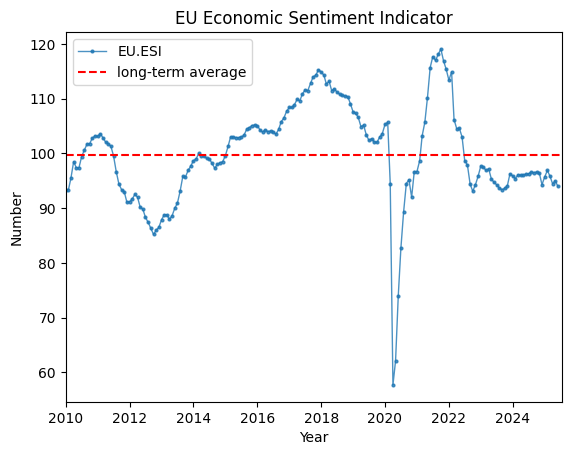

In [173]:
region = 'EU'
sector = 'ESI'
start_date = datetime(2010, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = euro.table
df = df[['Year', 'Month', f'{region}.{sector}']].dropna()
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
series = df[f'{region}.{sector}']

fig, ax = plt.subplots()
ax.plot(dates, series, label=f'{region}.{sector}', **line_settings)
ax.hlines(series.mean(), start_date, end_date, label='long-term average', colors='r', linestyles='dashed')

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title(f'EU Economic Sentiment Indicator')
ax.legend()

plt.show()

## 5. Caixin Manufacturing and Services PMI

The Caixin PMI (Purchasing Managers' Index) is a monthly indicator of the economic health of China's [manufacturing](https://tradingeconomics.com/china/manufacturing-pmi) and [services](https://tradingeconomics.com/china/manufacturing-pmi) sectors, specifically focusing on the private sector. Readings above 50 indicate expansion, while those below 50 suggest contraction. The Caixin PMI is closely watched by policymakers and traders as it provides early insights into the performance of Chinese businesses. 

#### Getting Data from the Caixin Manufacturing and Services PMI

In [271]:
caixin = CaixinPmi.download()

joint_table = caixin.manufacturing_table.merge(caixin.services_table)
displayMD("Caixin PMI", bold=True, align='center')
displayMD(joint_table, bold=True, align='center')

<p style="text-align: center";><b>Caixin PMI</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Manufacturing PMI</b></th>
      <th><b>Services PMI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>50.4</td>
      <td>50.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>48.3</td>
      <td>51.1</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>50.4</td>
      <td>50.6</td>
    </tr>
  </tbody>
</table></div>

## 6. Market Data Snapshot from Trading Economics

[Trading Economics](https://tradingeconomics.com/commodities) provides a wealth of data related to the global economy in powerful formats. The classes and functions used below are written for the convenience of carrying out custom computations/visualizations with the data.

#### Getting Market Data from Trading Economics

_The MarketData object has five attributes, each representing an asset class. Each attribute is a named tuple containing multiple fields. Each of those fields contain a Pandas Dataframe as value._

In [272]:
market = MarketData.download()

fields = (', ').join(market.__dict__.keys())
displayMD(fields)

<p style="text-align: left";>_commodities, _stocks, _bonds, _currencies, _crypto</p>

<br> The different tables for each asset class can be accessed using dot notation as shown below.

In [273]:
energy_table = market.commodities.energy
energy_table = energy_table.set_index(energy_table.columns[0])

displayMD("Commodities - Energy", bold=True, align='center')
displayMD(energy_table, index=True, bold=True, align='center')

indices_table = market.stocks.major
indices_table = indices_table.set_index(indices_table.columns[0])

displayMD("Major Stock Indices", bold=True, align='center')
displayMD(indices_table, index=True, bold=True, align='center')

<p style="text-align: center";><b>Commodities - Energy</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Energy</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Crude Oil</b></th>
      <td>USD/Bbl</td>
      <td>66.779</td>
      <td>-0.3</td>
      <td>-2.27</td>
      <td>-4.94</td>
      <td>-6.89</td>
      <td>-17.31</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Brent</b></th>
      <td>USD/Bbl</td>
      <td>69.135</td>
      <td>-0.11</td>
      <td>-1.45</td>
      <td>-5.59</td>
      <td>-7.38</td>
      <td>-17.43</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Natural gas</b></th>
      <td>USD/MMBtu</td>
      <td>3.491</td>
      <td>0.72</td>
      <td>4.52</td>
      <td>-6.86</td>
      <td>-3.91</td>
      <td>59.55</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Gasoline</b></th>
      <td>USD/Gal</td>
      <td>2.1849</td>
      <td>1.06</td>
      <td>0.04</td>
      <td>-2.41</td>
      <td>8.57</td>
      <td>-11.42</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Heating Oil</b></th>
      <td>USD/Gal</td>
      <td>2.4178</td>
      <td>1.17</td>
      <td>-0.96</td>
      <td>-1.26</td>
      <td>4.34</td>
      <td>-1.99</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Coal</b></th>
      <td>USD/T</td>
      <td>111.1</td>
      <td>-0.8</td>
      <td>1.46</td>
      <td>4.81</td>
      <td>-11.3</td>
      <td>-17.67</td>
      <td>Jul/14</td>
    </tr>
    <tr>
      <th><b>TTF Gas</b></th>
      <td>EUR/MWh</td>
      <td>34.47</td>
      <td>-2.77</td>
      <td>0.74</td>
      <td>-9.01</td>
      <td>-31.68</td>
      <td>5.1</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>UK Gas</b></th>
      <td>GBp/thm</td>
      <td>82.3755</td>
      <td>-3.37</td>
      <td>0.81</td>
      <td>-7.31</td>
      <td>-34.3</td>
      <td>8.18</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Ethanol</b></th>
      <td>USD/Gal</td>
      <td>1.77</td>
      <td>0.0</td>
      <td>4.42</td>
      <td>6.31</td>
      <td>4.73</td>
      <td>-5.6</td>
      <td>Jul/14</td>
    </tr>
    <tr>
      <th><b>Naphtha</b></th>
      <td>USD/T</td>
      <td>552.05</td>
      <td>-0.96</td>
      <td>-0.53</td>
      <td>-2.96</td>
      <td>-9.72</td>
      <td>-20.69</td>
      <td>Jul/14</td>
    </tr>
    <tr>
      <th><b>Uranium</b></th>
      <td>USD/Lbs</td>
      <td>72.3</td>
      <td>0.77</td>
      <td>-4.81</td>
      <td>-5.12</td>
      <td>-0.96</td>
      <td>-16.17</td>
      <td>Jul/14</td>
    </tr>
    <tr>
      <th><b>Propane</b></th>
      <td>USD/Gal</td>
      <td>0.73</td>
      <td>-0.89</td>
      <td>-0.49</td>
      <td>-5.8</td>
      <td>-5.6</td>
      <td>-8.61</td>
      <td>Jul/14</td>
    </tr>
    <tr>
      <th><b>Methanol</b></th>
      <td>CNY/T</td>
      <td>2365.0</td>
      <td>-0.63</td>
      <td>0.51</td>
      <td>-5.55</td>
      <td>-14.53</td>
      <td>-7.15</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>Urals Oil</b></th>
      <td>USD/Bbl</td>
      <td>65.52</td>
      <td>-1.41</td>
      <td>2.26</td>
      <td>-2.18</td>
      <td>-4.36</td>
      <td>-18.65</td>
      <td>Jul/14</td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Major Stock Indices</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Major</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>US500</b></th>
      <td>6270.96</td>
      <td>0.04</td>
      <td>0.73</td>
      <td>3.94</td>
      <td>6.62</td>
      <td>10.65</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>US30</b></th>
      <td>44211.0</td>
      <td>-0.56</td>
      <td>-0.07</td>
      <td>3.99</td>
      <td>3.92</td>
      <td>7.95</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>US100</b></th>
      <td>23002.0</td>
      <td>0.64</td>
      <td>1.32</td>
      <td>4.85</td>
      <td>9.47</td>
      <td>12.76</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>JP225</b></th>
      <td>39668.0</td>
      <td>0.53</td>
      <td>-0.05</td>
      <td>3.54</td>
      <td>-0.57</td>
      <td>-3.89</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>GB100</b></th>
      <td>8941.0</td>
      <td>-0.64</td>
      <td>0.98</td>
      <td>0.74</td>
      <td>9.39</td>
      <td>9.5</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>DE40</b></th>
      <td>24069.0</td>
      <td>-0.38</td>
      <td>-0.57</td>
      <td>1.56</td>
      <td>20.9</td>
      <td>29.98</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>FR40</b></th>
      <td>7764.0</td>
      <td>-0.57</td>
      <td>-0.04</td>
      <td>0.27</td>
      <td>5.19</td>
      <td>2.42</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>IT40</b></th>
      <td>39953.0</td>
      <td>-0.58</td>
      <td>-0.57</td>
      <td>0.06</td>
      <td>16.87</td>
      <td>16.25</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>ES35</b></th>
      <td>13874.0</td>
      <td>-1.16</td>
      <td>-1.46</td>
      <td>-1.68</td>
      <td>19.65</td>
      <td>25.09</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>ASX200</b></th>
      <td>8550.0</td>
      <td>-0.23</td>
      <td>-0.47</td>
      <td>0.02</td>
      <td>4.79</td>
      <td>6.89</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>SHANGHAI</b></th>
      <td>3505.0</td>
      <td>-0.42</td>
      <td>0.22</td>
      <td>3.43</td>
      <td>4.57</td>
      <td>17.76</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>SENSEX</b></th>
      <td>82571.0</td>
      <td>0.39</td>
      <td>-1.36</td>
      <td>0.95</td>
      <td>5.67</td>
      <td>2.3</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>TSX</b></th>
      <td>27027.0</td>
      <td>-0.63</td>
      <td>0.46</td>
      <td>1.72</td>
      <td>9.3</td>
      <td>17.53</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>MOEX</b></th>
      <td>2755.0</td>
      <td>1.52</td>
      <td>-0.01</td>
      <td>0.64</td>
      <td>-4.43</td>
      <td>-6.49</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>IBOVESPA</b></th>
      <td>134758.0</td>
      <td>-0.4</td>
      <td>-3.26</td>
      <td>-3.23</td>
      <td>12.03</td>
      <td>4.37</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>IPC</b></th>
      <td>56330.0</td>
      <td>-0.06</td>
      <td>-1.49</td>
      <td>-1.26</td>
      <td>13.69</td>
      <td>3.61</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>NL25</b></th>
      <td>923.0</td>
      <td>0.3</td>
      <td>0.71</td>
      <td>-0.18</td>
      <td>5.08</td>
      <td>-1.09</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>CH20</b></th>
      <td>11881.0</td>
      <td>-0.5</td>
      <td>-0.75</td>
      <td>-1.74</td>
      <td>2.41</td>
      <td>-3.1</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>SAALL</b></th>
      <td>97019.0</td>
      <td>0.23</td>
      <td>-0.24</td>
      <td>2.5</td>
      <td>15.37</td>
      <td>19.59</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>STI</b></th>
      <td>4120.0</td>
      <td>0.26</td>
      <td>1.78</td>
      <td>5.41</td>
      <td>8.77</td>
      <td>18.12</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>HK50</b></th>
      <td>24441.0</td>
      <td>0.98</td>
      <td>1.21</td>
      <td>1.58</td>
      <td>21.84</td>
      <td>37.87</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>NZX 50</b></th>
      <td>12690.0</td>
      <td>0.09</td>
      <td>-1.32</td>
      <td>0.0</td>
      <td>-3.21</td>
      <td>4.15</td>
      <td>Jul/15</td>
    </tr>
    <tr>
      <th><b>EU50</b></th>
      <td>5356.0</td>
      <td>-0.27</td>
      <td>-0.3</td>
      <td>0.3</td>
      <td>9.39</td>
      <td>8.24</td>
      <td>Jul/15</td>
    </tr>
  </tbody>
</table></div>

<br> In future, a method may be built into the MarketData class to allow preset plots to be generated.<br>Below is a visualization of the YoY % price changes across various commodities:

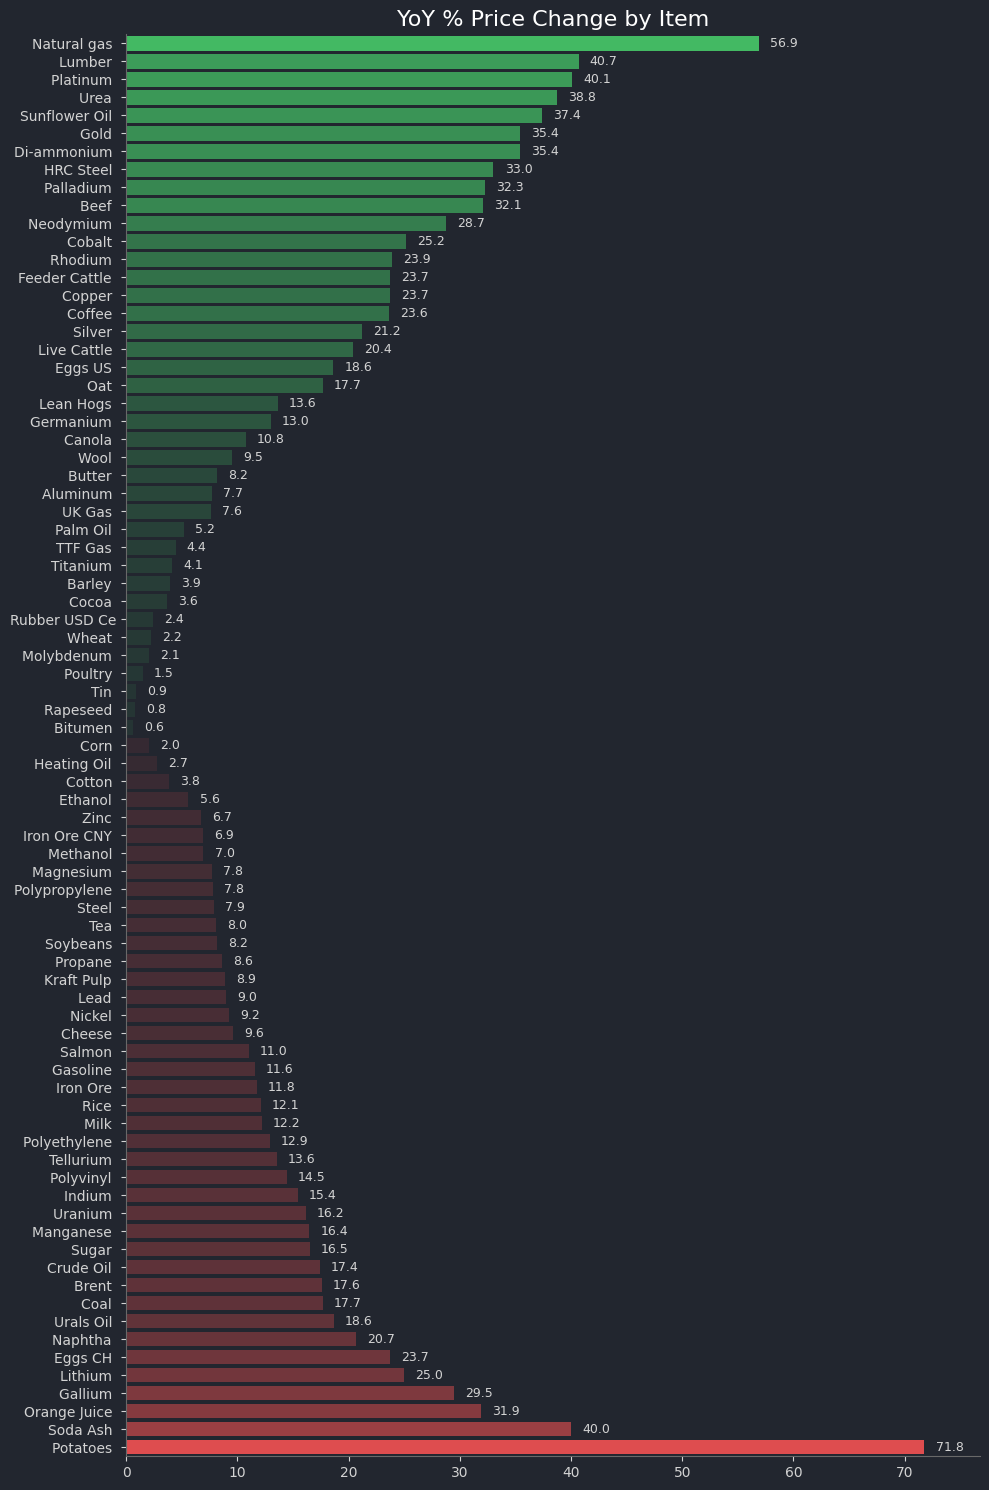

In [ ]:
# Prepare x and y data
df = market.commodities.all.copy()
df = df[['Item', 'YoY %']][(df['Category'] != 'Index') & (df['Category'] != 'Electricity')]
df_sorted = df.sort_values(by='YoY %', ascending=False, ignore_index=True)
x = df_sorted['YoY %']
y = df_sorted['Item']

# Define colors
background_color = '#22262F'
pos_bar_color = '#30CC5A'
neg_bar_color = '#F63538'
title_color = 'white'
axes_label_color = 'lightgray'
tick_color = 'lightgray'
spine_color = 'dimgray'
data_label_color = 'lightgray'

# Create figure
bar_colors = ['r' if x < 0 else 'g' for x in x]
color_palette = {'r': neg_bar_color, 'g': pos_bar_color}
x = abs(x)

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=x, y=y, hue=bar_colors, palette=color_palette, legend=False)
ax.set_title('YoY % Price Change by Item', fontsize=16, color=title_color)
ax.set_xlabel('')
ax.set_ylabel('')

# Add data labels
for container in ax.containers:
    for bar in container:
        x_val = bar.get_width()
        y_val = bar.get_y() + bar.get_height() / 2
        label = f'{round(x_val, 1)}'
        ax.text(x_val + 1, y_val, label, va='center', ha='left', fontsize=9, color=data_label_color)

# Customize figure
ax.set_xlim(0, max(x) + 5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.tick_params(axis='x', colors=tick_color)
ax.tick_params(axis='y', colors=tick_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)

# Control transparency of bars based on change magnitude; less change = less solid
x = df_sorted['YoY %']
x_pos = x[x >= 0]
x_neg = abs(x[x < 0])
norm_alpha_pos = colors.Normalize(vmin=x_pos.min(), vmax=0.9*x_pos.max(), clip=True)
norm_alpha_neg = colors.Normalize(vmin=x_neg.min(), vmax=0.9*x_neg.max(), clip=True)
min_alpha, max_alpha = 0.1, 1
bar_alphas = [
    min_alpha + (max_alpha - min_alpha) * norm_alpha_neg(abs(val)) if val < 0 else
    min_alpha + (max_alpha - min_alpha) * norm_alpha_pos(abs(val)) for val in x]
[bar.set_alpha(alpha) for alpha, bar in zip(bar_alphas, ax.patches)]

# Show plot
plt.tight_layout()
plt.show()

## 7. Industry and Stock-Level Data from FinViz

[Finviz](https://finviz.com/) offers a wealth of stock market data and a powerful screener. The idea is not to replicae the screener, but to quickly and conveniently retrieve data for custom computations/visualizations.

#### Getting Industry-Level and Stock-Level Data from Finviz

In [274]:
industries = Finviz.download_industries()

industry_table = industries.table
industry_table = industry_table.set_index(industry_table.columns[0]) 
displayMD(industry_table.head(), index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Sector</b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>EPS past 5Y (%)</b></th>
      <th><b>EPS next 5Y (%)</b></th>
      <th><b>Sales past 5Y (%)</b></th>
      <th><b>Float Short (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Change (%)</b></th>
      <th><b>Volume (m USD)</b></th>
      <th><b>Stocks</b></th>
    </tr>
    <tr>
      <th><b>Industry</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Advertising Agencies</b></th>
      <td>Communication Services</td>
      <td>201870.0</td>
      <td>40.16</td>
      <td>21.57</td>
      <td>1.35</td>
      <td>2.9</td>
      <td>8.5</td>
      <td>14.42</td>
      <td>23.44</td>
      <td>0.79</td>
      <td>57.39</td>
      <td>29.83</td>
      <td>28.44</td>
      <td>6.53</td>
      <td>1.37</td>
      <td>-2.6</td>
      <td>32.21</td>
      <td>-7.32</td>
      <td>50.8</td>
      <td>-9.53</td>
      <td>1.7</td>
      <td>47.2</td>
      <td>2.37</td>
      <td>0.54</td>
      <td>36.13</td>
      <td>42</td>
    </tr>
    <tr>
      <th><b>Aerospace &amp; Defense</b></th>
      <td>Industrials</td>
      <td>1514280.0</td>
      <td>44.19</td>
      <td>30.4</td>
      <td>3.0</td>
      <td>3.08</td>
      <td>7.31</td>
      <td>23.79</td>
      <td>47.93</td>
      <td>0.84</td>
      <td>20.22</td>
      <td>14.71</td>
      <td>3.66</td>
      <td>4.79</td>
      <td>3.26</td>
      <td>7.32</td>
      <td>26.09</td>
      <td>30.94</td>
      <td>40.61</td>
      <td>30.08</td>
      <td>1.83</td>
      <td>161.91</td>
      <td>1.56</td>
      <td>-0.14</td>
      <td>81.28</td>
      <td>75</td>
    </tr>
    <tr>
      <th><b>Agricultural Inputs</b></th>
      <td>Basic Materials</td>
      <td>125680.0</td>
      <td>30.84</td>
      <td>16.29</td>
      <td>2.9</td>
      <td>1.62</td>
      <td>1.64</td>
      <td>20.87</td>
      <td>19.8</td>
      <td>2.28</td>
      <td>3.44</td>
      <td>10.62</td>
      <td>4.39</td>
      <td>1.94</td>
      <td>-3.52</td>
      <td>0.82</td>
      <td>22.37</td>
      <td>21.41</td>
      <td>26.94</td>
      <td>25.07</td>
      <td>2.12</td>
      <td>18.49</td>
      <td>0.78</td>
      <td>-1.05</td>
      <td>4.67</td>
      <td>16</td>
    </tr>
    <tr>
      <th><b>Airlines</b></th>
      <td>Industrials</td>
      <td>158380.0</td>
      <td>12.01</td>
      <td>9.17</td>
      <td>0.64</td>
      <td>0.58</td>
      <td>2.55</td>
      <td>2.99</td>
      <td>12.54</td>
      <td>1.26</td>
      <td>-6.55</td>
      <td>18.63</td>
      <td>6.12</td>
      <td>6.72</td>
      <td>5.32</td>
      <td>9.79</td>
      <td>33.29</td>
      <td>-4.7</td>
      <td>11.48</td>
      <td>0.5</td>
      <td>1.74</td>
      <td>134.37</td>
      <td>1.07</td>
      <td>-1.37</td>
      <td>46.56</td>
      <td>18</td>
    </tr>
    <tr>
      <th><b>Airports &amp; Air Services</b></th>
      <td>Industrials</td>
      <td>38410.0</td>
      <td>26.46</td>
      <td>19.27</td>
      <td>2.05</td>
      <td>5.07</td>
      <td>5.43</td>
      <td>10.53</td>
      <td>29.99</td>
      <td>4.39</td>
      <td>20.18</td>
      <td>12.89</td>
      <td>13.34</td>
      <td>7.47</td>
      <td>4.0</td>
      <td>9.04</td>
      <td>39.48</td>
      <td>29.02</td>
      <td>30.05</td>
      <td>33.16</td>
      <td>2.52</td>
      <td>26.66</td>
      <td>2.45</td>
      <td>1.45</td>
      <td>21.09</td>
      <td>9</td>
    </tr>
  </tbody>
</table></div>

In [275]:
stocks = Finviz.download_stocks(num_rows=10) # if num_rows is not specified, all rows are returned.

stocks_table = stocks.table
stocks_table = stocks_table.set_index(stocks_table.columns[0])
displayMD(stocks_table, index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Company</b></th>
      <th><b>Index</b></th>
      <th><b>Sector</b></th>
      <th><b>Industry</b></th>
      <th><b>Country</b></th>
      <th><b>Exchange</b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Book/sh</b></th>
      <th><b>Cash/sh</b></th>
      <th><b>Dividend</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>Dividend TTM</b></th>
      <th><b>Dividend Ex Date</b></th>
      <th><b>Payout Ratio (%)</b></th>
      <th><b>EPS</b></th>
      <th><b>EPS next Q</b></th>
      <th><b>EPS This Y (%)</b></th>
      <th><b>EPS Next Y (%)</b></th>
      <th><b>EPS Past 5Y (%)</b></th>
      <th><b>EPS Next 5Y (%)</b></th>
      <th><b>Sales Past 5Y (%)</b></th>
      <th><b>Sales Q/Q (%)</b></th>
      <th><b>EPS Q/Q (%)</b></th>
      <th><b>EPS YoY TTM (%)</b></th>
      <th><b>Sales YoY TTM (%)</b></th>
      <th><b>Sales (m USD)</b></th>
      <th><b>Income (m USD)</b></th>
      <th><b>EPS Surprise (%)</b></th>
      <th><b>Revenue Surprise (%)</b></th>
      <th><b>Outstanding (m USD)</b></th>
      <th><b>Float (m USD)</b></th>
      <th><b>Float %</b></th>
      <th><b>Insider Own (%)</b></th>
      <th><b>Insider Trans (%)</b></th>
      <th><b>Inst Own (%)</b></th>
      <th><b>Inst Trans (%)</b></th>
      <th><b>Short Float (%)</b></th>
      <th><b>Short Ratio</b></th>
      <th><b>Short Interest (m USD)</b></th>
      <th><b>ROA (%)</b></th>
      <th><b>ROE (%)</b></th>
      <th><b>ROIC (%)</b></th>
      <th><b>Curr R</b></th>
      <th><b>Quick R</b></th>
      <th><b>LTDebt/Eq</b></th>
      <th><b>Debt/Eq</b></th>
      <th><b>Gross M (%)</b></th>
      <th><b>Oper M (%)</b></th>
      <th><b>Profit M (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Beta</b></th>
      <th><b>ATR</b></th>
      <th><b>Volatility W (%)</b></th>
      <th><b>Volatility M (%)</b></th>
      <th><b>SMA20 (%)</b></th>
      <th><b>SMA50 (%)</b></th>
      <th><b>SMA200 (%)</b></th>
      <th><b>50D High (%)</b></th>
      <th><b>50D Low (%)</b></th>
      <th><b>52W High (%)</b></th>
      <th><b>52W Low (%)</b></th>
      <th><b>52W Range</b></th>
      <th><b>All-Time High (%)</b></th>
      <th><b>All-Time Low (%)</b></th>
      <th><b>RSI</b></th>
      <th><b>Earnings</b></th>
      <th><b>IPO Date</b></th>
      <th><b>Optionable</b></th>
      <th><b>Shortable</b></th>
      <th><b>Employees</b></th>
      <th><b>Change from Open (%)</b></th>
      <th><b>Gap (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Volume</b></th>
      <th><b>Target Price</b></th>
      <th><b>Prev Close</b></th>
      <th><b>Open</b></th>
      <th><b>High</b></th>
      <th><b>Low</b></th>
      <th><b>Price</b></th>
      <th><b>Change (%)</b></th>
    </tr>
    <tr>
      <th><b>Ticker</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>A</b></th>
      <td>Agilent Technologies Inc</td>
      <td>S&amp;P 500</td>
      <td>Healthcare</td>
      <td>Diagnostics &amp; Research</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>33040.0</td>
      <td>28.69</td>
      <td>19.22</td>
      <td>3.59</td>
      <td>4.99</td>
      <td>5.38</td>
      <td>22.24</td>
      <td>27.79</td>
      <td>21.61</td>
      <td>5.23</td>
      <td>0.98</td>
      <td>0.84</td>
      <td>0.98</td>
      <td>01/07/2025</td>
      <td>21.31</td>
      <td>4.05</td>
      <td>1.37</td>
      <td>5.49</td>
      <td>8.47</td>
      <td>5.63</td>
      <td>7.99</td>
      <td>4.75</td>
      <td>6.04</td>
      <td>-28.23</td>
      <td>-4.08</td>
      <td>0.56</td>
      <td>6630.0</td>
      <td>1170.0</td>
      <td>3.57</td>
      <td>2.54</td>
      <td>283.94</td>
      <td>282.97</td>
      <td>99.66</td>
      <td>0.38</td>
      <td>-1.29</td>
      <td>90.66</td>
      <td>1.49</td>
      <td>1.19</td>
      <td>1.7</td>
      <td>3.35</td>
      <td>10.13</td>
      <td>18.88</td>
      <td>12.29</td>
      <td>2.09</td>
      <td>1.6</td>
      <td>0.55</td>
      <td>0.57</td>
      <td>53.95</td>
      <td>23.94</td>
      <td>17.59</td>
      <td>-3.88</td>
      <td>-2.18</td>
      <td>13.25</td>
      <td>-15.39</td>
      <td>-11.08</td>
      <td>-13.41</td>
      <td>1.22</td>
      <td>3.18</td>
      <td>2.78</td>
      <td>2.3</td>
      <td>-2.38</td>
      <td>0.97</td>
      <td>-8.82</td>
      <td>-8.0</td>
      <td>11.74</td>
      <td>-24.39</td>
      <td>20.63</td>
      <td>96.43 - 153.84</td>
      <td>-35.22</td>
      <td>1544.19</td>
      <td>45.25</td>
      <td>28/05/2025</td>
      <td>18/11/1999</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>17900</td>
      <td>-2.1</td>
      <td>-1.05</td>
      <td>2.14</td>
      <td>1.98</td>
      <td>1.92</td>
      <td>1224719</td>
      <td>137.86</td>
      <td>120.08</td>
      <td>118.82</td>
      <td>119.76</td>
      <td>115.75</td>
      <td>116.32</td>
      <td>-3.13</td>
    </tr>
    <tr>
      <th><b>AA</b></th>
      <td>Alcoa Corp</td>
      <td>&lt;NA&gt;</td>
      <td>Basic Materials</td>
      <td>Aluminum</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>7480.0</td>
      <td>8.55</td>
      <td>11.09</td>
      <td>0.25</td>
      <td>0.58</td>
      <td>1.29</td>
      <td>5.63</td>
      <td>21.49</td>
      <td>22.46</td>
      <td>5.13</td>
      <td>0.4</td>
      <td>1.38</td>
      <td>0.4</td>
      <td>20/05/2025</td>
      <td>142.65</td>
      <td>3.38</td>
      <td>0.32</td>
      <td>140.29</td>
      <td>-19.7</td>
      <td>&lt;NA&gt;</td>
      <td>34.29</td>
      <td>3.03</td>
      <td>23.45</td>
      <td>249.72</td>
      <td>190.21</td>
      <td>21.56</td>
      <td>12910.0</td>
      <td>860.0</td>
      <td>27.88</td>
      <td>-3.05</td>
      <td>258.9</td>
      <td>257.8</td>
      <td>99.58</td>
      <td>0.43</td>
      <td>0.0</td>
      <td>76.31</td>
      <td>0.73</td>
      <td>6.66</td>
      <td>2.7</td>
      <td>17.16</td>
      <td>5.95</td>
      <td>17.53</td>
      <td>10.25</td>
      <td>1.71</td>
      <td>1.0</td>
      <td>0.44</td>
      <td>0.46</td>
      <td>18.94</td>
      <td>16.28</td>
      <td>6.66</td>
      <td>-5.34</td>
      <td>0.07</td>
      <td>16.69</td>
      <td>-19.58</td>
      <td>-26.29</td>
      <td>-23.56</td>
      <td>2.24</td>
      <td>1.22</td>
      <td>3.5</td>
      <td>3.41</td>
      <td>-2.54</td>
      <td>1.52</td>
      <td>-16.2</td>
      <td>-9.65</td>
      <td>19.59</td>
      <td>-39.54</td>
      <td>34.14</td>
      <td>21.53 - 47.77</td>
      <td>-70.56</td>
      <td>459.69</td>
      <td>47.09</td>
      <td>16/07/2025</td>
      <td>18/10/2016</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>13900</td>
      <td>-4.09</td>
      <td>1.07</td>
      <td>1.86</td>
      <td>6.36</td>
      <td>1.1</td>
      <td>2255443</td>
      <td>33.5</td>
      <td>29.79</td>
      <td>30.11</td>
      <td>30.13</td>
      <td>28.83</td>
      <td>28.88</td>
      <td>-3.05</td>
    </tr>
    <tr>
      <th><b>AACB</b></th>
      <td>Artius II Acquisition Inc</td>
      <td>&lt;NA&gt;</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>296.97</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.42</td>
      <td>824.91</td>
      <td>&lt;NA&gt;</td>
      <td>7.11</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>23.65</td>
      <td>23.48</td>
      <td>99.28</td>
      <td>20.15</td>
      <td>0.0</td>
      <td>11.85</td>
      <td>&lt;NA&gt;</td>
      <td>0.03</td>
      <td>0.05</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>5.42</td>
      <td>5.42</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-0.04</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.24</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.03</td>
      <td>0.11</td>
      <td>-0.18</td>
      <td>0.49</td>
      <td>0.75</td>
      <td>-0.78</td>
      <td>2.03</td>
      <td>-0.78</td>
      <td>2.55</td>
      <td>9.85 - 10.18</td>
      <td>-0.78</td>
      <td>2.55</td>
      <td>52.16</td>
      <td>&amp;nbsp;</td>
      <td>07/04/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>1</td>
      <td>-0.04</td>
      <td>-0.05</td>
      <td>&lt;NA&gt;</td>
      <td>0.1168</td>
      <td>0.15</td>
      <td>5626</td>
      <td>&lt;NA&gt;</td>
      <td>10.11</td>
      <td>10.1</td>
      <td>10.1</td>
      <td>10.1</td>
      <td>10.1</td>
      <td>-0.09</td>
    </tr>
    <tr>
      <th><b>AACG</b></th>
      <td>ATA Creativity Global ADR</td>
      <td>&lt;NA&gt;</td>
      <td>Consumer Defensive</td>
      <td>Education &amp; Training Services</td>
      <td>China</td>
      <td>NASD</td>
      <td>28.13</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.74</td>
      <td>3.07</td>
      <td>5.18</td>
      <td>&lt;NA&gt;</td>
      <td>0.29</td>
      <td>0.17</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>27/08/2018</td>
      <td>&lt;NA&gt;</td>
      <td>-0.14</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>26.78</td>
      <td>&lt;NA&gt;</td>
      <td>21.36</td>
      <td>14.52</td>
      <td>27.8</td>
      <td>10.87</td>
      <td>20.89</td>
      <td>38.23</td>
      <td>-4.35</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>31.96</td>
      <td>8.84</td>
      <td>27.66</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.56</td>
      <td>0.31</td>
      <td>0.98</td>
      <td>5.69</td>
      <td>0.09</td>
      <td>-6.8</td>
      <td>-38.69</td>
      <td>-37.79</td>
      <td>0.2</td>
      <td>0.2</td>
      <td>0.26</td>
      <td>0.71</td>
      <td>52.51</td>
      <td>-13.84</td>
      <td>-11.37</td>
      <td>6.22</td>
      <td>6.93</td>
      <td>-8.31</td>
      <td>-6.99</td>
      <td>10.01</td>
      <td>4.03</td>
      <td>0.9</td>
      <td>0.04</td>
      <td>6.13</td>
      <td>4.73</td>
      <td>7.24</td>
      <td>0.85</td>
      <td>-3.17</td>
      <td>-11.1</td>
      <td>17.17</td>
      <td>-19.99</td>
      <td>76.02</td>
      <td>0.50 - 1.10</td>
      <td>-95.54</td>
      <td>305.64</td>
      <td>57.81</td>
      <td>25/03/2025</td>
      <td>29/01/2008</td>
      <td>No</td>
      <td>Yes</td>
      <td>599</td>
      <td>2.34</td>
      <td>-3.51</td>
      <td>1.0</td>
      <td>0.01519</td>
      <td>0.28</td>
      <td>1349</td>
      <td>6.5</td>
      <td>0.89</td>
      <td>0.86</td>
      <td>0.88</td>
      <td>0.87</td>
      <td>0.88</td>
      <td>-1.26</td>
    </tr>
    <tr>
      <th><b>AACI</b></th>
      <td>Armada Acquisition Corp. II</td>
      <td>&lt;NA&gt;</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>275.85</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>27.5</td>
      <td>22.65</td>
      <td>82.36</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-0.05</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-0.1</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.19</td>
      <td>&lt;NA&gt;</td>
      <td>-0.05</td>
      <td>-0.05</td>
      <td>-0.05</td>
      <td>-0.69</td>
      <td>0.3</td>
      <td>-0.69</td>
      <td>0.3</td>
      <td>10.00 - 10.10</td>
      <td>-0.69</td>
      <td>0.3</td>
      <td>42.86</td>
      <td>&amp;nbsp;</td>
      <td>24/06/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>&lt;NA&gt;</td>
      <td>-0.2</td>
      <td>0.2</td>
      <td>&lt;NA&gt;</td>
      <td>0.14828</td>
      <td>3.23</td>
      <td>150002</td>
      <td>&lt;NA&gt;</td>
      <td>10.03</td>
      <td>10.05</td>
      <td>10.03</td>
      <td>10.03</td>
      <td>10.03</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th><b>AACIU</b></th>
      <td>Armada Acquisition Corp. II</td>
      <td>&lt;NA&gt;</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>241.25</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>23.71</td>
      <td>15.43</td>
      <td>65.08</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.05</td>
      <td>0.02</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.05</td>
      <td>0.74</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.55</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.12</td>
      <td>0.14</td>
      <td>0.06</td>
      <td>0.56</td>
      <td>0.56</td>
      <td>-0.44</td>
      <td>1.65</td>
      <td>-0.44</td>
      <td>1.65</td>
      <td>10.01 - 10.22</td>
      <td>-0.44</td>
      <td>1.65</td>
      <td>57.79</td>
      <td>&amp;nbsp;</td>
      <td>22/05/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>&lt;NA&gt;</td>
      <td>0.35</td>
      <td>-0.2</td>
      <td>&lt;NA&gt;</td>
      <td>0.43503</td>
      <td>0.0</td>
      <td>6</td>
      <td>&lt;NA&gt;</td>
      <td>10.16</td>
      <td>10.14</td>
      <td>10.14</td>
      <td>10.14</td>
      <td>10.18</td>
      <td>0.15</td>
    </tr>
    <tr>
      <th><b>AACT</b></th>
      <td>Ares Acquisition Corporation II</td>
      <td>&lt;NA&gt;</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>704.89</td>
      <td>31.53</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.34</td>
      <td>1068.01</td>
      <td>&lt;NA&gt;</td>
      <td>8.51</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>0.0</td>
      <td>0.36</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-53.18</td>
      <td>-3.08</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>22.59</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>50.0</td>
      <td>46.39</td>
      <td>92.78</td>
      <td>25.0</td>
      <td>0.0</td>
      <td>74.21</td>
      <td>&lt;NA&gt;</td>
      <td>0.11</td>
      <td>0.07</td>
      <td>0.05</td>
      <td>4.15</td>
      <td>4.34</td>
      <td>4.21</td>
      <td>0.24</td>
      <td>0.24</td>
      <td>0.01</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.66</td>
      <td>0.75</td>
      <td>1.92</td>
      <td>3.78</td>
      <td>6.59</td>
      <td>3.78</td>
      <td>-0.01</td>
      <td>0.04</td>
      <td>0.31</td>
      <td>0.34</td>
      <td>0.66</td>
      <td>0.62</td>
      <td>2.82</td>
      <td>-1.94</td>
      <td>1.33</td>
      <td>-1.94</td>
      <td>6.59</td>
      <td>10.69 - 11.62</td>
      <td>-1.94</td>
      <td>12.88</td>
      <td>65.66</td>
      <td>&amp;nbsp;</td>
      <td>12/06/2023</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>4</td>
      <td>0.22</td>
      <td>-0.18</td>
      <td>&lt;NA&gt;</td>
      <td>0.72031</td>
      <td>0.26</td>
      <td>59640</td>
      <td>&lt;NA&gt;</td>
      <td>11.39</td>
      <td>11.37</td>
      <td>11.41</td>
      <td>11.37</td>
      <td>11.4</td>
      <td>0.04</td>
    </tr>
    <tr>
      <th><b>AAL</b></th>
      <td>American Airlines Group Inc</td>
      <td>&lt;NA&gt;</td>
      <td>Industrials</td>
      <td>Airlines</td>
      <td>USA</td>
      <td>NASD</td>
      <td>8090.0</td>
      <td>14.16</td>
      <td>6.43</td>
      <td>1.9</td>
      <td>0.15</td>
      <td>&lt;NA&gt;</td>
      <td>1.0</td>
      <td>5.13</td>
      <td>-6.84</td>
      <td>12.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>04/02/2020</td>
      <td>0.0</td>
      <td>0.87</td>
      <td>0.78</td>
      <td>-63.02</td>
      <td>163.01</td>
      <td>-20.93</td>
      <td>7.45</td>
      <td>3.44</td>
      <td>-0.15</td>
      <td>-50.91</td>
      <td>36.07</td>
      <td>1.92</td>
      <td>54190.0</td>
      <td>685.0</td>
      <td>14.99</td>
      <td>0.11</td>
      <td>659.48</td>
      <td>649.04</td>
      <td>98.42</td>
      <td>1.59</td>
      <td>-0.49</td>
      <td>66.86</td>
      <td>-1.77</td>
      <td>11.07</td>
      <td>1.2</td>
      <td>71.86</td>
      <td>1.08</td>
      <td>&lt;NA&gt;</td>
      <td>2.61</td>
      <td>0.52</td>
      <td>0.42</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>20.89</td>
      <td>5.44</td>
      <td>1.26</td>
      <td>5.93</td>
      <td>12.53</td>
      <td>26.85</td>
      <td>-33.26</td>
      <td>14.32</td>
      <td>-29.63</td>
      <td>1.43</td>
      <td>0.5</td>
      <td>4.82</td>
      <td>3.79</td>
      <td>7.17</td>
      <td>7.76</td>
      <td>-7.5</td>
      <td>-6.93</td>
      <td>22.91</td>
      <td>-35.78</td>
      <td>44.31</td>
      <td>8.50 - 19.10</td>
      <td>-79.24</td>
      <td>48.68</td>
      <td>59.32</td>
      <td>24/07/2025</td>
      <td>09/12/2013</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>133300</td>
      <td>-1.48</td>
      <td>0.57</td>
      <td>2.07</td>
      <td>59.95</td>
      <td>1.29</td>
      <td>25025033</td>
      <td>13.87</td>
      <td>12.38</td>
      <td>12.45</td>
      <td>12.5</td>
      <td>12.24</td>
      <td>12.27</td>
      <td>-0.92</td>
    </tr>
    <tr>
      <th><b>AAM</b></th>
      <td>AA Mission Acquisition Corp</td>
      <td>&lt;NA&gt;</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>458.83</td>
      <td>49.62</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.32</td>
      <td>7647.12</td>
      <td>&lt;NA&gt;</td>
      <td>7.92</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>0.0</td>
      <td>0.21</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>77100.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>9.25</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>35.35</td>
      <td>29.32</td>
      <td>82.94</td>
      <td>33.32</td>
      <td>0.0</td>
      <td>83.69</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>0.01</td>
      <td>0.0</td>
      <td>5.17</td>
      <td>5.31</td>
      <td>2.66</td>
      <td>0.5</td>
      <td>0.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-0.04</td>
      <td>0.24</td>
      <td>1.71</td>
      <td>3.42</td>
      <td>&lt;NA&gt;</td>
      <td>3.32</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.13</td>
      <td>0.11</td>
      <td>0.15</td>
      <td>0.55</td>
      <td>2.43</td>
      <td>-3.29</td>
      <td>1.41</td>
      <td>-3.29</td>
      <td>4.77</td>
      <td>9.96 - 10.79</td>
      <td>-3.29</td>
      <td>4.77</td>
      <td>60.28</td>
      <td>&amp;nbsp;</td>
      <td>16/09/2024</td>
      <td>No</td>
      <td>Yes</td>
      <td>2</td>
      <td>0.04</td>
      <td>-0.05</td>
      <td>&lt;NA&gt;</td>
      <td>0.06056</td>
      <td>0.1</td>
      <td>1977</td>
      <td>&lt;NA&gt;</td>
      <td>10.44</td>
      <td>10.43</td>
      <td>10.43</td>
      <td>10.43</td>
      <td>10.44</td>
      <td>-0.02</td>
    </tr>
    <tr>
      <th><b>AAME</b></th>
      <td>Atlantic American Corp</td>
      <td>&lt;NA&gt;</td>
      <td>Financial</td>
      <td>Insurance - Life</td>
      <td>USA</td>
      <td>NASD</td>
      <td>40.79</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.21</td>
      <td>0.4</td>
      <td>&lt;NA&gt;</td>
      <td>4.56</td>
      <td>5.02</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>1.0</td>
      <td>0.02</td>
      <td>09/04/2025</td>
      <td>&lt;NA&gt;</td>
      <td>-0.09</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-42.6</td>
      <td>&lt;NA&gt;</td>
      <td>-1.03</td>
      <td>6.66</td>
      <td>133.56</td>
      <td>-66.36</td>
      <td>2.04</td>
      <td>191.35</td>
      <td>-1.87</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>20.4</td>
      <td>3.83</td>
      <td>18.77</td>
      <td>81.21</td>
      <td>0.0</td>
      <td>4.26</td>
      <td>-1.91</td>
      <td>0.17</td>
      <td>0.42</td>
      <td>0.01</td>
      <td>-0.41</td>
      <td>-1.43</td>
      <td>-1.28</td>
      <td>0.76</td>
      <td>&lt;NA&gt;</td>
      <td>0.42</td>
      <td>0.43</td>
      <td>&lt;NA&gt;</td>
      <td>0.84</td>
      <td>-0.98</td>
      <td>-9.09</td>
      <td>8.7</td>
      <td>51.52</td>
      <td>31.58</td>
      <td>28.21</td>
      <td>29.87</td>
      <td>0.75</td>
      <td>0.13</td>
      <td>6.27</td>
      <td>7.51</td>
      <td>-4.15</td>
      <td>7.12</td>
      <td>21.89</td>
      <td>-23.37</td>
      <td>39.37</td>
      <td>-23.37</td>
      <td>60.29</td>
      <td>1.25 - 2.61</td>
      <td>-87.48</td>
      <td>450.54</td>
      <td>48.71</td>
      <td>&amp;nbsp;</td>
      <td>17/03/1980</td>
      <td>No</td>
      <td>Yes</td>
      <td>156</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.01538</td>
      <td>0.15</td>
      <td>743</td>
      <td>&lt;NA&gt;</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>2.02</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table></div>

<br>The description of a particular stock may be obtained as follows:

In [278]:
desc = Finviz.stock_description('AAPL')
displayMD(desc, block=True)

><p style="text-align: left";>Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other varieties of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac, iPad, AirPods, Apple TV, Apple Watch, Beats products, AppleCare, iCloud, digital content stores, streaming, and licensing services. The company was founded by Steven Paul Jobs, Ronald Gerald Wayne, and Stephen G. Wozniak in April 1976 and is headquartered in Cupertino, CA.</p>